# P5: Segmentez des clients d'un site e-commerce
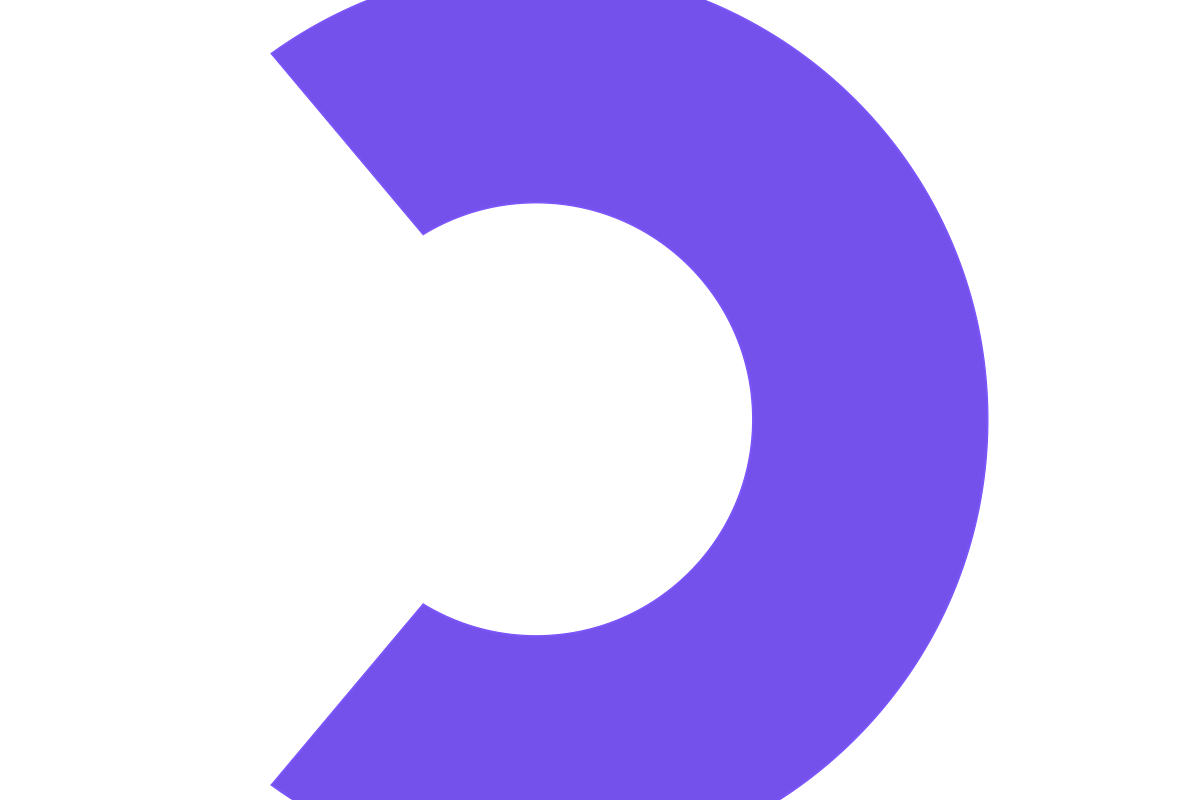

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from utils import *

# File system manangement
import os
import gc
import time

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import decomposition
from functions import *
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift

# Instantiate the clustering model and visualizer 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['lines.linewidth'] = 2
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

# Load the clients dataset

In [104]:
is_poly = False # set iw we take also polynomial variables
if is_poly:
    df_clients = pd.read_csv('data/df_clients_poly.csv')
else:
    df_clients = pd.read_csv('data/df_clients.csv')

In [105]:
df_clients.head()

customer_unique_id  order_id_COUNT payment_type_LAMBDA  \
0  0000366f3b9a7992bf8c76cfdf3221e2               1         credit_card   
1  0000b849f77a49e4a4ce2b2a4ca5be3f               1         credit_card   
2  0000f46a3911fa3c0805444483337064               1         credit_card   
3  0000f6ccb0745a6a4b88665a16c9f078               1         credit_card   
4  0004aac84e0df4da2b147fca70cf8255               1         credit_card   

   payment_value_SUM  payment_sequential_MAX  payment_installments_MAX  \
0             141.90                       1                         8   
1              27.19                       1                         1   
2              86.22                       1                         8   
3              43.62                       1                         4   
4             196.89                       1                         6   

   review_score_MAX  price_MEAN  freight_value_SUM  product_weight_g_MEAN  \
0                 5      129.90              12.00                 1500.0   
1                 4       18.90               8.29                  375.0   
2                 3       69.00              17.22                 1500.0   
3                 4       25.99              17.63                  150.0   
4                 5      180.00              16.89                 6050.0   

   ...  product_width_cm_MEAN  my_categoty_LAMBDA  \
0  ...                   32.0         home_layout   
1  ...                   18.0       personal_care   
2  ...                   35.0           telephony   
3  ...                   11.0           telephony   
4  ...                   11.0           telephony   

   customer_state_top10_LAMBDA seller_state_top10_LAMBDA geolocation_lat_MEAN  \
0                           SP                        SP           -23.335331   
1                           SP                        SP           -23.567395   
2                           SC                        SP           -27.543787   
3                        Other                        SP            -1.311011   
4                           SP                        SP           -23.504368   

  geolocation_lng_MEAN  diff_car_app_MEAN  diff_del_car_MEAN  \
0           -46.828647                2.0                4.0   
1           -46.792957                2.0                1.0   
2           -48.625680                3.0               23.0   
3           -48.482884                1.0               19.0   
4           -47.466156                2.0               11.0   

   diff_est_act_MEAN  diff_cust_pur_MEAN  
0                5.0               112.0  
1                5.0               115.0  
2                2.0               538.0  
3               12.0               322.0  
4                8.0               289.0  

[5 rows x 22 columns]

In [106]:
df_clients.shape

(90563, 22)

In [107]:
df_clients.describe(include=[object])

customer_unique_id payment_type_LAMBDA  \
count                              90563               90563   
unique                             90563                   4   
top     0000366f3b9a7992bf8c76cfdf3221e2         credit_card   
freq                                   1               68773   

       my_categoty_LAMBDA customer_state_top10_LAMBDA  \
count               90563                       90563   
unique                 19                          11   
top              dressing                          SP   
freq                13069                       38092   

       seller_state_top10_LAMBDA  
count                      90563  
unique                        11  
top                           SP  
freq                       63734

In [108]:
df_clients.describe()

order_id_COUNT  payment_value_SUM  payment_sequential_MAX  \
count    90563.000000       90563.000000            90563.000000   
mean         1.078376         173.592049                1.022702   
std          0.363645         265.651236                0.235845   
min          1.000000           0.010000                1.000000   
25%          1.000000          61.690000                1.000000   
50%          1.000000         106.970000                1.000000   
75%          1.000000         186.565000                1.000000   
max         14.000000       15978.650000               19.000000   

       payment_installments_MAX  review_score_MAX    price_MEAN  \
count              90563.000000      90563.000000  90563.000000   
mean                   2.928238          4.165034    125.879131   
std                    2.719429          1.277844    189.125956   
min                    1.000000          1.000000      0.850000   
25%                    1.000000          4.000000     42.912500   
50%                    2.000000          5.000000     79.000000   
75%                    4.000000          5.000000    139.900000   
max                   24.000000          5.000000   6735.000000   

       freight_value_SUM  product_weight_g_MEAN  product_length_cm_MEAN  \
count       90563.000000           90563.000000            90563.000000   
mean           21.659392            2110.137608               30.134459   
std            18.094929            3737.171043               15.994605   
min             0.000000               0.000000                7.000000   
25%            13.610000             300.000000               18.000000   
50%            16.860000             700.000000               25.000000   
75%            23.090000            1825.000000               38.000000   
max          1002.290000           40425.000000              105.000000   

       product_height_cm_MEAN  product_width_cm_MEAN  geolocation_lat_MEAN  \
count            90563.000000           90563.000000          90563.000000   
mean                16.508322              23.045707            -21.192829   
std                 13.244235              11.630412              5.622525   
min                  2.000000               6.000000            -36.605374   
25%                  8.000000              15.000000            -23.590044   
50%                 13.000000              20.000000            -22.925733   
75%                 20.000000              30.000000            -20.134901   
max                105.000000             118.000000             42.184003   

       geolocation_lng_MEAN  diff_car_app_MEAN  diff_del_car_MEAN  \
count          90563.000000       90563.000000       90563.000000   
mean             -46.189445           2.716040           9.269436   
std                4.066280           3.435663           8.690395   
min              -72.666706           0.000000           0.000000   
25%              -48.122403           1.000000           4.000000   
50%              -46.632467           2.000000           7.000000   
75%              -43.627351           3.000000          12.000000   
max               -8.577855         107.000000         205.000000   

       diff_est_act_MEAN  diff_cust_pur_MEAN  
count       90563.000000        90563.000000  
mean           11.875550          239.721926  
std            10.075638          152.277718  
min          -188.000000            1.000000  
25%             7.000000          116.000000  
50%            12.000000          221.000000  
75%            17.000000          348.000000  
max           147.000000          696.000000

## Deleting the customer id column

In [109]:
df_clients = df_clients.drop(["customer_unique_id"], axis=1)

## Encoding categorical variables

In [110]:
df_clients_encoded, new_columns = encode_categorical_variables(df_clients, nan_as_category = True)

In [111]:
df_clients_encoded.shape
df_clients.shape

(90563, 66)

(90563, 21)

In [112]:
df_clients_encoded_corr = df_clients_encoded.corr()

In [113]:
df_clients_encoded = remove_columns_regarding_correlation(df_clients_encoded, df_clients_encoded_corr, hdc_make=False, hc_make=True)

In [114]:
df_clients_encoded.shape

(90563, 66)

In [115]:
df_clients_encoded.head()

order_id_COUNT  payment_value_SUM  payment_sequential_MAX  \
0               1             141.90                       1   
1               1              27.19                       1   
2               1              86.22                       1   
3               1              43.62                       1   
4               1             196.89                       1   

   payment_installments_MAX  review_score_MAX  price_MEAN  freight_value_SUM  \
0                         8                 5      129.90              12.00   
1                         1                 4       18.90               8.29   
2                         8                 3       69.00              17.22   
3                         4                 4       25.99              17.63   
4                         6                 5      180.00              16.89   

   product_weight_g_MEAN  product_length_cm_MEAN  product_height_cm_MEAN  ...  \
0                 1500.0                    34.0                     7.0  ...   
1                  375.0                    26.0                    11.0  ...   
2                 1500.0                    25.0                    50.0  ...   
3                  150.0                    19.0                     5.0  ...   
4                 6050.0                    16.0                     3.0  ...   

   seller_state_top10_LAMBDA_ES  seller_state_top10_LAMBDA_GO  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   seller_state_top10_LAMBDA_MG  seller_state_top10_LAMBDA_Other  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   

   seller_state_top10_LAMBDA_PR  seller_state_top10_LAMBDA_RJ  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   seller_state_top10_LAMBDA_RS  seller_state_top10_LAMBDA_SC  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   seller_state_top10_LAMBDA_SP  seller_state_top10_LAMBDA_nan  
0                             1                              0  
1                             1                              0  
2                             1                              0  
3                             1                              0  
4                             1                              0  

[5 rows x 66 columns]

## Normalization dataset

In [116]:
# Dropping the categorical data and use just the numerical data
df_clients = df_clients.drop(["payment_type_LAMBDA", "my_categoty_LAMBDA", "customer_state_top10_LAMBDA", "seller_state_top10_LAMBDA"], axis=1)# 

#.preprocessing.PowerTransformer().fit(df_clients) #preprocessing.MinMaxScaler, StandardScaler
#df_clients = pd.DataFrame(std_scale.transform(df_clients), columns=df_clients.columns)

std_scale = preprocessing.RobustScaler().fit(df_clients) #preprocessing.MinMaxScaler, StandardScaler RobustScaler
df_clients = pd.DataFrame(std_scale.transform(df_clients), columns=df_clients.columns)

std_scale = preprocessing.RobustScaler().fit(df_clients_encoded)
df_clients_encoded = pd.DataFrame(std_scale.transform(df_clients_encoded), columns=df_clients_encoded.columns)

In [117]:
df_clients.head()

order_id_COUNT  payment_value_SUM  payment_sequential_MAX  \
0             0.0           0.279720                     0.0   
1             0.0          -0.638879                     0.0   
2             0.0          -0.166166                     0.0   
3             0.0          -0.507307                     0.0   
4             0.0           0.720080                     0.0   

   payment_installments_MAX  review_score_MAX  price_MEAN  freight_value_SUM  \
0                  2.000000               0.0    0.524810          -0.512658   
1                 -0.333333              -1.0   -0.619667          -0.904008   
2                  2.000000              -2.0   -0.103106           0.037975   
3                  0.666667              -1.0   -0.546565           0.081224   
4                  1.333333               0.0    1.041371           0.003165   

   product_weight_g_MEAN  product_length_cm_MEAN  product_height_cm_MEAN  \
0               0.524590                    0.45               -0.500000   
1              -0.213115                    0.05               -0.166667   
2               0.524590                    0.00                3.083333   
3              -0.360656                   -0.30               -0.666667   
4               3.508197                   -0.45               -0.833333   

   product_width_cm_MEAN  geolocation_lat_MEAN  geolocation_lng_MEAN  \
0               0.800000             -0.118548             -0.043644   
1              -0.133333             -0.185712             -0.035704   
2               1.000000             -1.336574             -0.443424   
3              -0.600000              6.255811             -0.411656   
4              -0.600000             -0.167471             -0.185468   

   diff_car_app_MEAN  diff_del_car_MEAN  diff_est_act_MEAN  diff_cust_pur_MEAN  
0                0.0             -0.375               -0.7           -0.469828  
1                0.0             -0.750               -0.7           -0.456897  
2                0.5              2.000               -1.0            1.366379  
3               -0.5              1.500                0.0            0.435345  
4                0.0              0.500               -0.4            0.293103

In [118]:
df_clients_encoded.head()

order_id_COUNT  payment_value_SUM  payment_sequential_MAX  \
0             0.0           0.279720                     0.0   
1             0.0          -0.638879                     0.0   
2             0.0          -0.166166                     0.0   
3             0.0          -0.507307                     0.0   
4             0.0           0.720080                     0.0   

   payment_installments_MAX  review_score_MAX  price_MEAN  freight_value_SUM  \
0                  2.000000               0.0    0.524810          -0.512658   
1                 -0.333333              -1.0   -0.619667          -0.904008   
2                  2.000000              -2.0   -0.103106           0.037975   
3                  0.666667              -1.0   -0.546565           0.081224   
4                  1.333333               0.0    1.041371           0.003165   

   product_weight_g_MEAN  product_length_cm_MEAN  product_height_cm_MEAN  ...  \
0               0.524590                    0.45               -0.500000  ...   
1              -0.213115                    0.05               -0.166667  ...   
2               0.524590                    0.00                3.083333  ...   
3              -0.360656                   -0.30               -0.666667  ...   
4               3.508197                   -0.45               -0.833333  ...   

   seller_state_top10_LAMBDA_ES  seller_state_top10_LAMBDA_GO  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   seller_state_top10_LAMBDA_MG  seller_state_top10_LAMBDA_Other  \
0                           0.0                              0.0   
1                           0.0                              0.0   
2                           0.0                              0.0   
3                           0.0                              0.0   
4                           0.0                              0.0   

   seller_state_top10_LAMBDA_PR  seller_state_top10_LAMBDA_RJ  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   seller_state_top10_LAMBDA_RS  seller_state_top10_LAMBDA_SC  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   seller_state_top10_LAMBDA_SP  seller_state_top10_LAMBDA_nan  
0                           0.0                            0.0  
1                           0.0                            0.0  
2                           0.0                            0.0  
3                           0.0                            0.0  
4                           0.0                            0.0  

[5 rows x 66 columns]

## Reduce data

We will reduce our data for testing the models in a more faster way. When the model will be selected we will apply it on the whole dataset.

In [119]:
df_clients_reduced = df_clients.sample(10000, random_state=10).copy()
df_clients_encoded_reduced = df_clients_encoded.sample(10000, random_state=10).copy()

In [144]:
is_reduced = False 
is_encoded = True

if is_reduced:
    if is_encoded:
        df = df_clients_encoded_reduced
    else:
        df = df_clients_reduced
else:
    if is_encoded:
        df = df_clients_encoded
    else:
        df = df_clients

# Dimension reduction

In [159]:
pca = PCA(random_state=10)

In [160]:
pca.fit(df)

PCA(random_state=10)

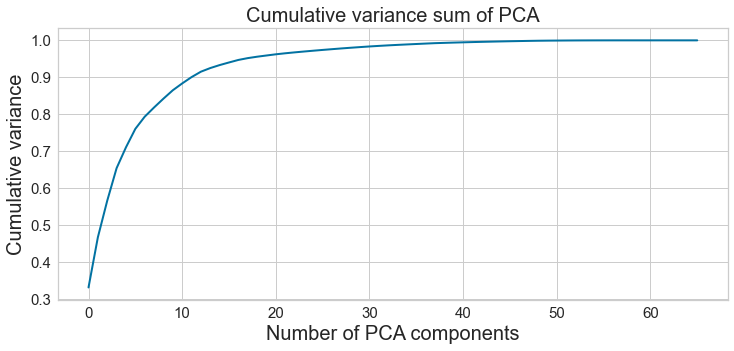

In [161]:
plt.figure(figsize=(12,5));
plt.title('Cumulative variance sum of PCA');
plt.xlabel('Number of PCA components');
plt.ylabel('Cumulative variance');
plt.plot(list(range(df.shape[1])),
    np.cumsum(pca.explained_variance_ratio_), '-x');

In [165]:
np.cumsum(pca.explained_variance_ratio_)[11] #18

0.9005923706940898

In [166]:
pca.fit(df)

PCA(random_state=10)

In [167]:
n_comp = 11

In [168]:
colonnes_pca = df.columns

In [169]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(df)

X_projected = pca.fit_transform(df)


X_projected = pd.DataFrame(X_projected, index = df.index, columns = ['F{0}'.format(i) for i in range(n_comp)])

X_projected

PCA(n_components=11)

F0        F1         F2        F3        F4         F5  \
0      -0.802699  0.353050  -1.128556 -0.164817 -0.146050  -0.552324   
1      -2.615894 -0.197654  -0.846977  0.085236  0.203103  -0.069831   
2      -0.355309 -1.072869  -0.857264  1.118778  2.316960   0.299475   
3      -1.797738  0.723003   5.259495 -1.127424 -0.393379  -1.805224   
4       1.242589 -0.796107  -1.275283 -0.410649  0.248113  -1.025416   
...          ...       ...        ...       ...       ...        ...   
90558  52.601618  2.725928  13.620873 -4.099294 -7.081905  29.945528   
90559   0.000176 -1.281988   3.285079  3.697742 -1.213153  -1.208671   
90560  -1.026657  0.679165   1.933916 -1.556888 -1.351192  -0.273223   
90561  -1.104914  0.862751   0.300847 -0.884433 -0.276453  -0.240746   
90562  -2.038352  0.316359  -1.273127 -0.762262 -0.318753   0.480916   

             F6        F7        F8        F9       F10  
0     -0.555776 -0.062808 -1.707397  0.857910 -0.277771  
1      0.296679  0.347919  0.185140 -0.322063 -0.422175  
2     -0.593555 -0.842344  0.759335  3.049885  0.722399  
3      0.256704  0.122550 -0.297740  0.159499  2.101923  
4     -0.740226  0.204347 -0.969539  0.108550 -0.348397  
...         ...       ...       ...       ...       ...  
90558 -1.831809  2.598122  1.836586  0.000866 -3.713125  
90559 -0.518654  0.714791  1.062850  0.618031 -0.287460  
90560  0.065539 -0.582855  0.695096 -0.191920  3.015673  
90561 -0.515378 -0.226538 -0.160301  0.810190 -1.067016  
90562 -0.392677 -0.465972 -0.081790  0.591983  0.351355  

[90563 rows x 11 columns]

In [170]:
#features = df.columns
# Cercle des corrélations
#pcs = pca.components_
#display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

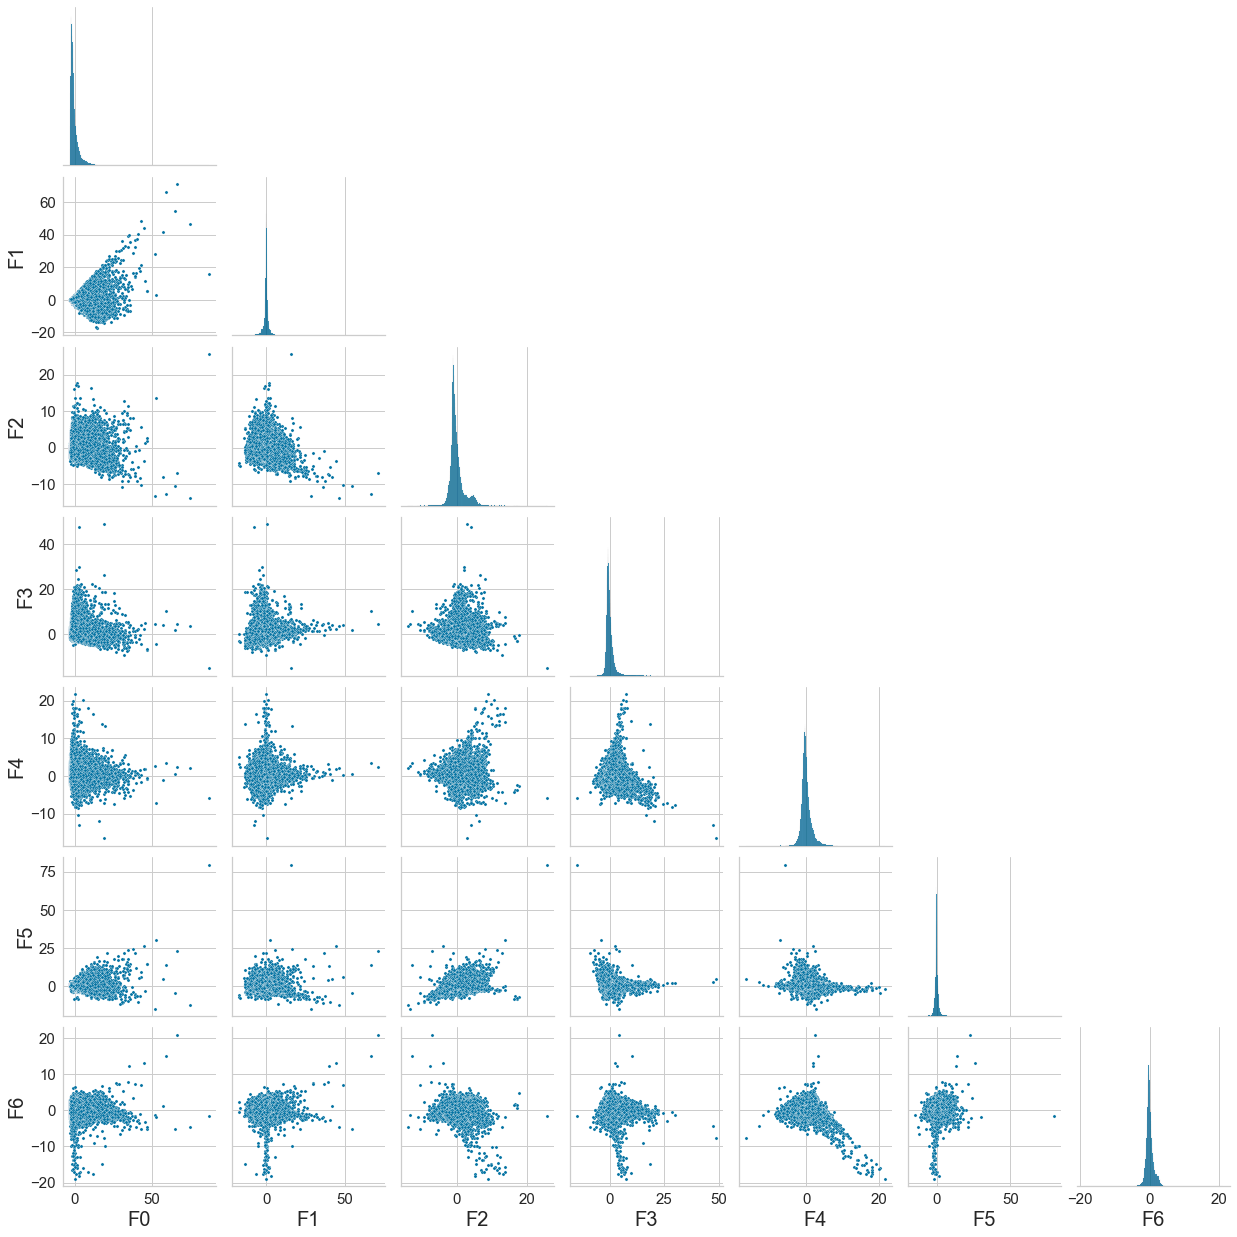

In [171]:
N = 7
sns.pairplot(X_projected.iloc[: , :N], plot_kws = {'s': 10}, corner=True)

In [172]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_projected.copy())
T = pd.DataFrame(T, columns=['T1', 'T2'])

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


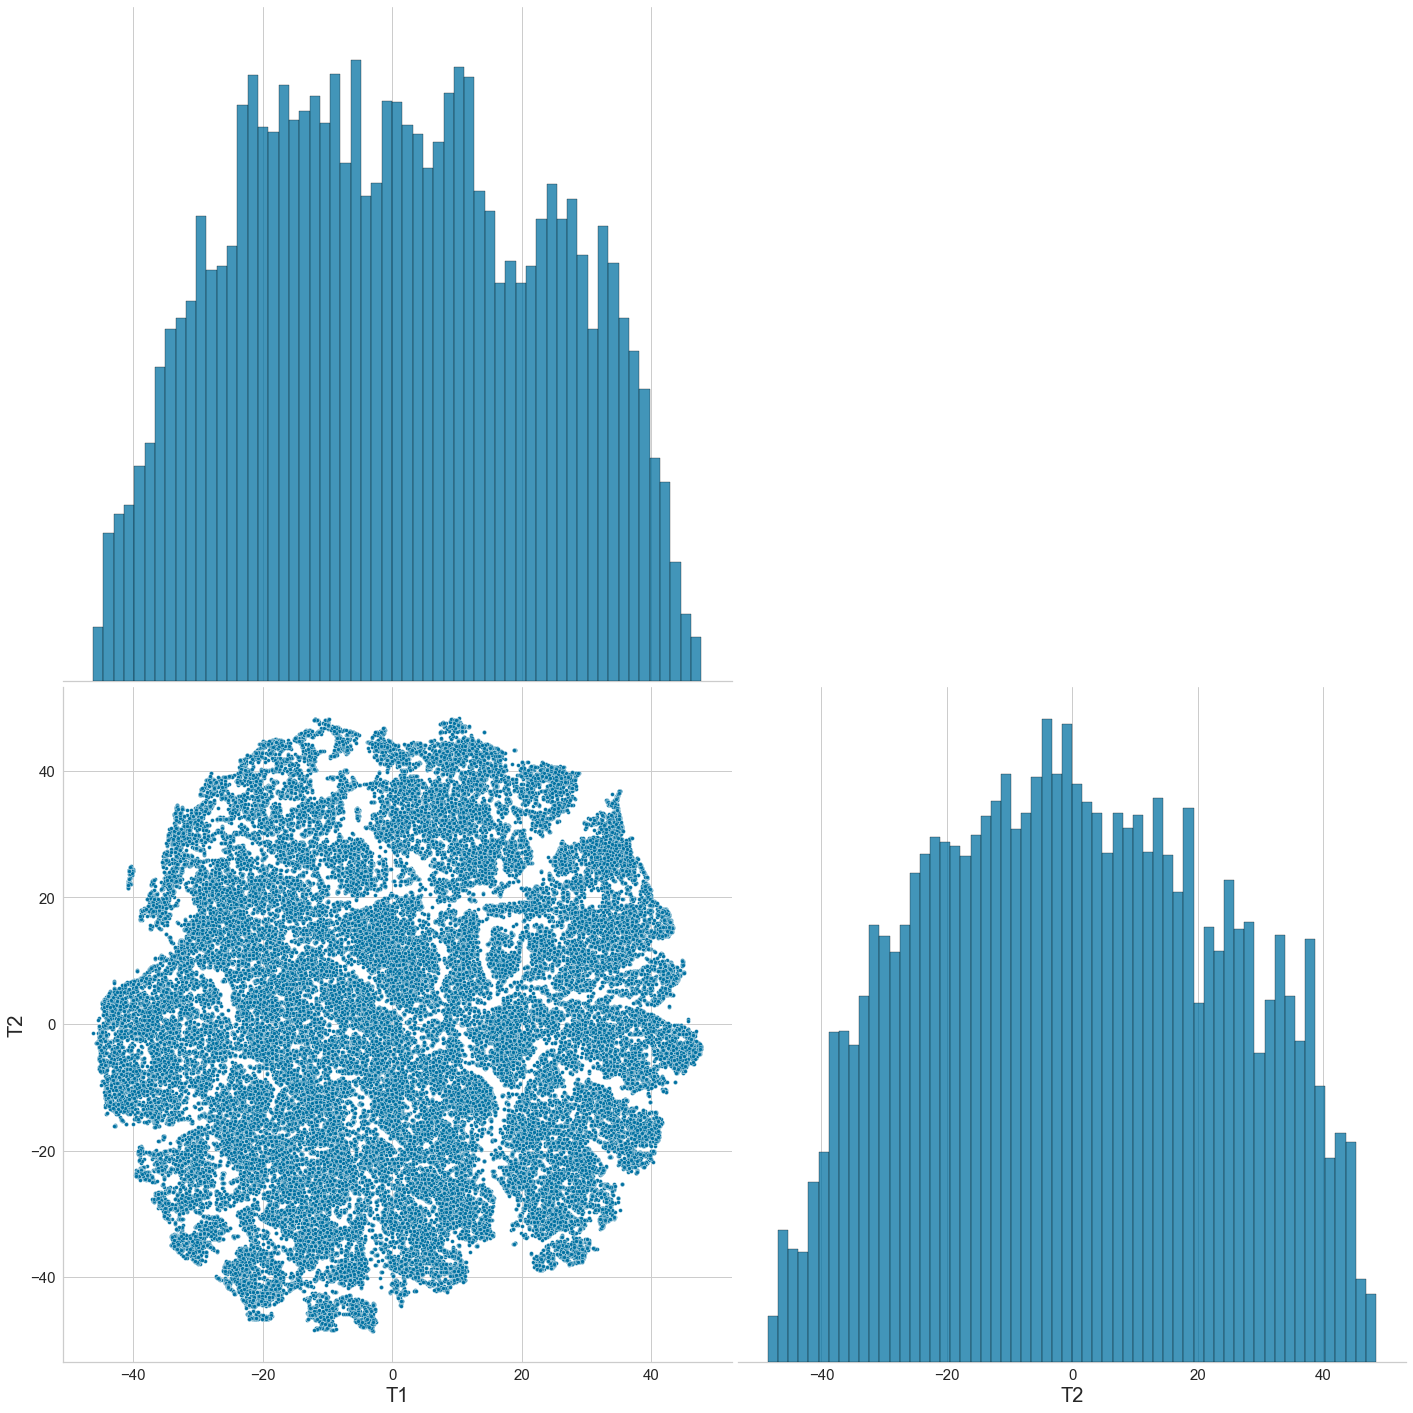

In [173]:
sns.pairplot(T, plot_kws = {'s': 15}, size=10, corner=True)

# Selecting the optimal number of clusters

In [135]:
# BIC for GMM
from sklearn.mixture import GaussianMixture
n_components = range(2, 15);
covariance_type = ['full', 'spherical', 'tied', 'diag']
score=[];

for cov in covariance_type:
    for n_comp in n_components:
        with timer('passing... {0} covariance with {1} clusters '.format(cov, n_comp)):
            gmm=GaussianMixture(n_components=n_comp, covariance_type=cov, init_params='kmeans', max_iter=1000, n_init=10);
            gmm.fit(X_projected);
            score.append((cov,n_comp,gmm.bic(X_projected),gmm.aic(X_projected)));

score = pd.DataFrame(score, columns = ['cov_type', 'k', 'bic', 'aic']);

passing... full covariance with 2 clusters  - done in 6s
passing... full covariance with 3 clusters  - done in 13s
passing... full covariance with 4 clusters  - done in 14s


KeyboardInterrupt: 

In [ ]:
sns.lineplot(x="k", y="bic",
            hue="cov_type",
            data=score);

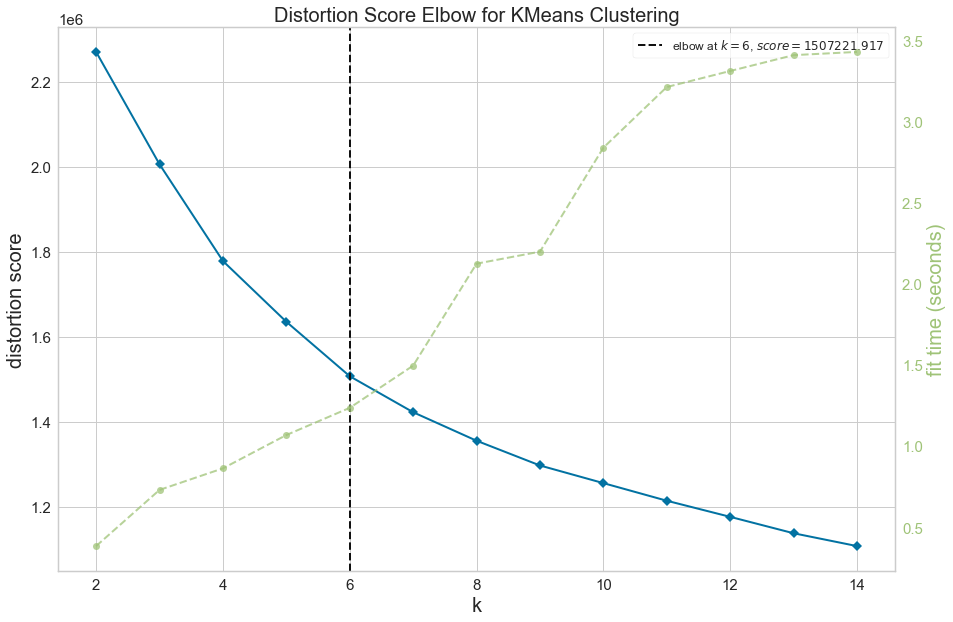

In [186]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=10, init='k-means++', n_init=10, max_iter=1500)
visualizer = KElbowVisualizer(model, k=(2,15))

vis = visualizer.fit(X_projected);    # Fit the data to the visualizer

visualizer.poof();    # Draw/show/poof the data

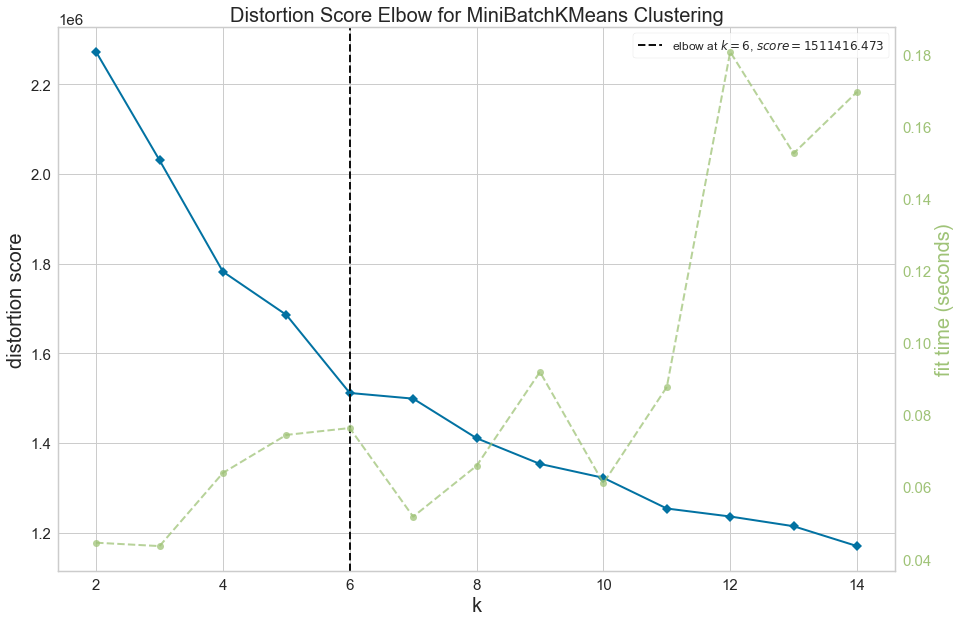

In [187]:
# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(random_state=10, init='k-means++', n_init=10, max_iter=1500)
visualizer = KElbowVisualizer(model, k=(2,15))

vis = visualizer.fit(X_projected);    # Fit the data to the visualizer

visualizer.poof();    # Draw/show/poof the data

In [ ]:
#from sklearn.metrics import davies_bouldin_score
#from sklearn.metrics import silhouette_score
#inertia = {}
#dict_kmeans = {}
#silhouettes_kmeans = {}
#davies_bouldin_kmeans = {}
#for k in range(2,20):
#    print('Kmeans for {0} clusters'.format(k))
#    kmeans = KMeans(n_clusters=k, random_state=10).fit(X_projected)
#    inertia[k] = kmeans.inertia_
#    dict_kmeans[k] = kmeans
#    silhouettes_kmeans[k] = silhouette_score(X = X_projected, labels= kmeans.labels_)
#    davies_bouldin_kmeans[k] = davies_bouldin_score(X = X_projected, labels= kmeans.labels_)

In [ ]:
#print('maximum value for silhuette score is for {0} clusters'.format(max(silhouettes_kmeans, key=silhouettes_kmeans.get)))
#print('the Davies Bouldin score is minimal for {0} clusters'.format(min(davies_bouldin_kmeans, key=davies_bouldin_kmeans.get)))

In [ ]:
#import scipy.cluster.hierarchy as shc
#from matplotlib import pyplot
#pyplot.figure(figsize=(15,10))  
#pyplot.title("Dendrograms")  
#dend = shc.dendrogram(shc.linkage(X_projected, method='ward'))

Due to theese analysis a choise of 7 clusters is made. Next We can see a silhuete vizualizer. Note that 6 and 5 clusters are also interesting to analyse. We will see next what choise we make.

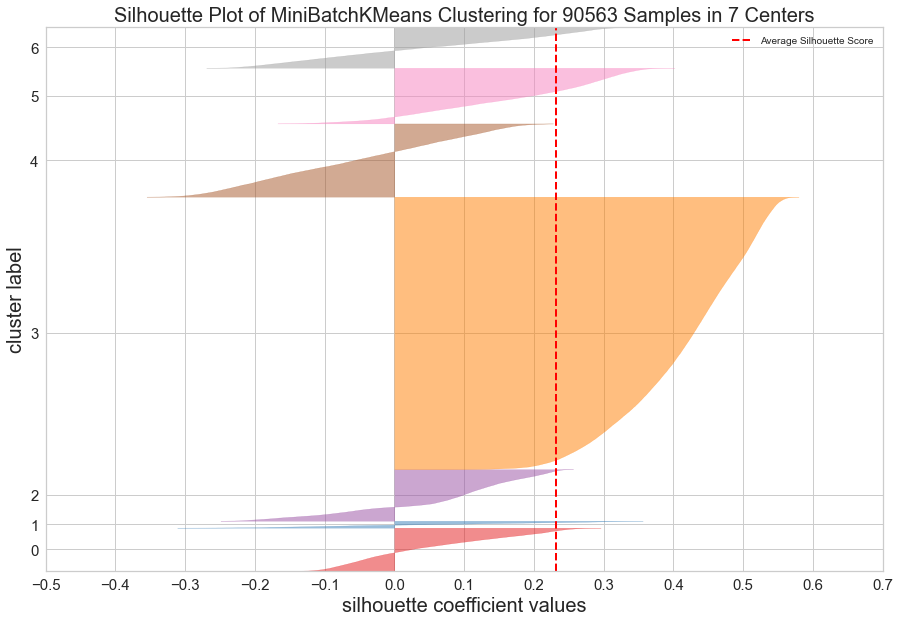

<AxesSubplot:title={'center':'Silhouette Plot of MiniBatchKMeans Clustering for 90563 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [188]:
# Instantiate the clustering model and visualizer 
model = MiniBatchKMeans(n_clusters=7, random_state=10, init='k-means++', n_init=10, max_iter=1500)
visualizer = SilhouetteVisualizer(model)
vis = visualizer.fit(X_projected)
visualizer.poof()    # Draw/show/poof the data

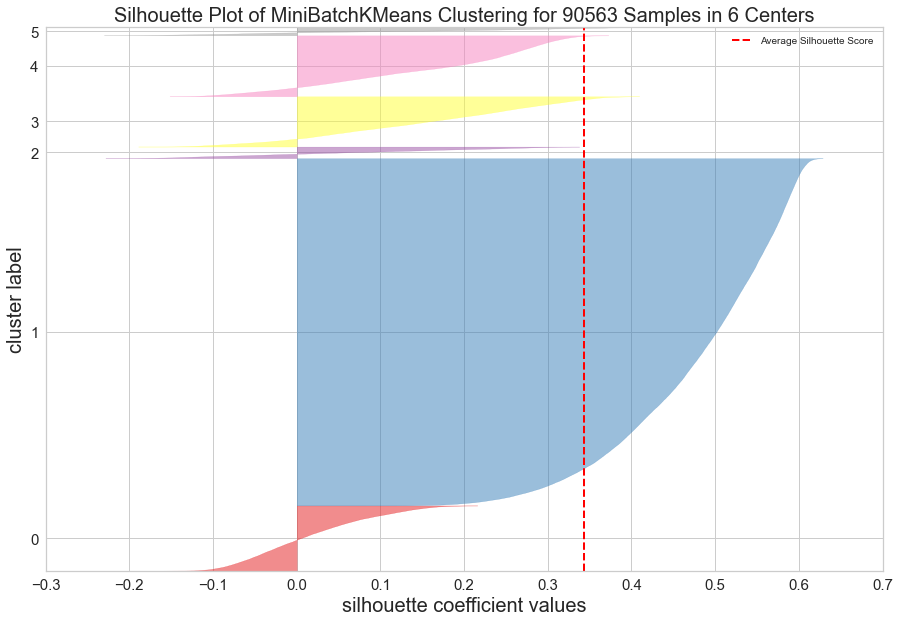

<AxesSubplot:title={'center':'Silhouette Plot of MiniBatchKMeans Clustering for 90563 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [189]:
model = MiniBatchKMeans(n_clusters=6, random_state=10, init='k-means++', n_init=10, max_iter=1500)
visualizer = SilhouetteVisualizer(model)
vis = visualizer.fit(X_projected)
visualizer.poof()    # Draw/show/poof the data

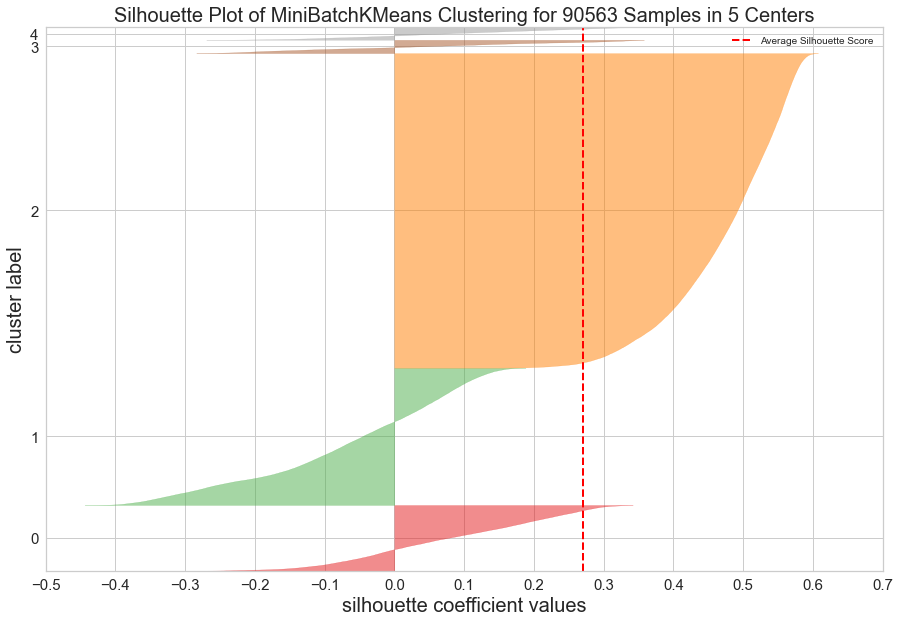

<AxesSubplot:title={'center':'Silhouette Plot of MiniBatchKMeans Clustering for 90563 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [190]:
# Instantiate the clustering model and visualizer 
model = MiniBatchKMeans(n_clusters=5, random_state=10, init='k-means++', n_init=10, max_iter=1500)
visualizer = SilhouetteVisualizer(model)
vis = visualizer.fit(X_projected)
visualizer.poof()    # Draw/show/poof the data

In the figure of Elbow score we can see that the curbe is slightly descending and a number of clusters can not be strongly selected. An optimal number of clusters is proposed by KElbowVisualizer to be equal to 7. However, analyzing the silhuate score, an we tend to propose an smaller number of clusters that is 5 or 6. Selecting 5 number of clusters could fascilitate grouping small clusters and also gives the posibility to analyse them better later in this work. Also we see that 5 clusters gives a higher average silhuette score.

# Applying unsupervised learning methods on our dataset.

## K-Means

In [191]:
kmeans = KMeans(n_clusters=6, random_state=10, init='k-means++', n_init=10, max_iter=1500).fit(X_projected)
X_projected['k_means_labels'] = kmeans.labels_
T['k_means_labels'] = kmeans.labels_

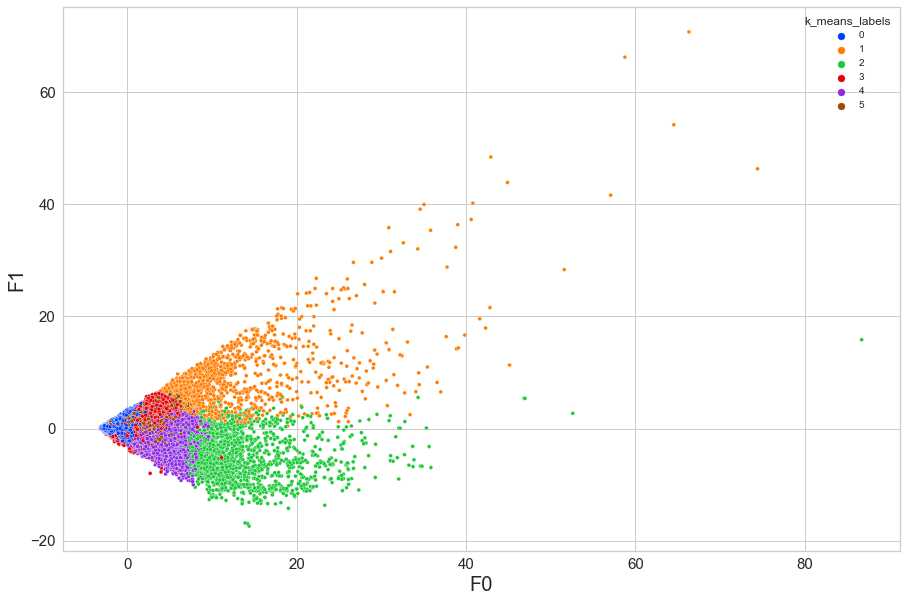

In [192]:
palette = sns.color_palette("bright", len(X_projected['k_means_labels'].unique()))  #Choosing color
sns.scatterplot(data = X_projected, x = 'F0', y = 'F1', 
                hue = 'k_means_labels',
                s=15, legend='full', palette=palette)
X_projected.drop(columns=['k_means_labels'], inplace=True);

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='T1', ylabel='T2'>

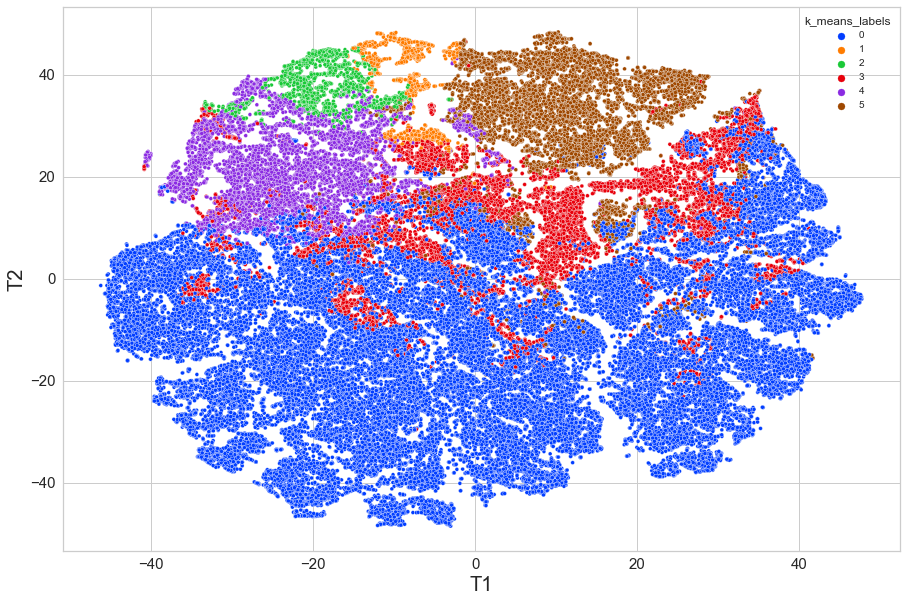

In [193]:
palette = sns.color_palette("bright", len(T.k_means_labels.unique()))  #Choosing color
sns.scatterplot(T.T1, T.T2, hue=T.k_means_labels, legend='full', palette=palette, s=15)

## MiniBatchKMeans

In [194]:
mkmeans = MiniBatchKMeans(n_clusters=6, random_state=10, init='k-means++', n_init=10, max_iter=1500).fit(X_projected)
X_projected['mk_means_labels'] = mkmeans.labels_
T['mk_means_labels'] = mkmeans.labels_

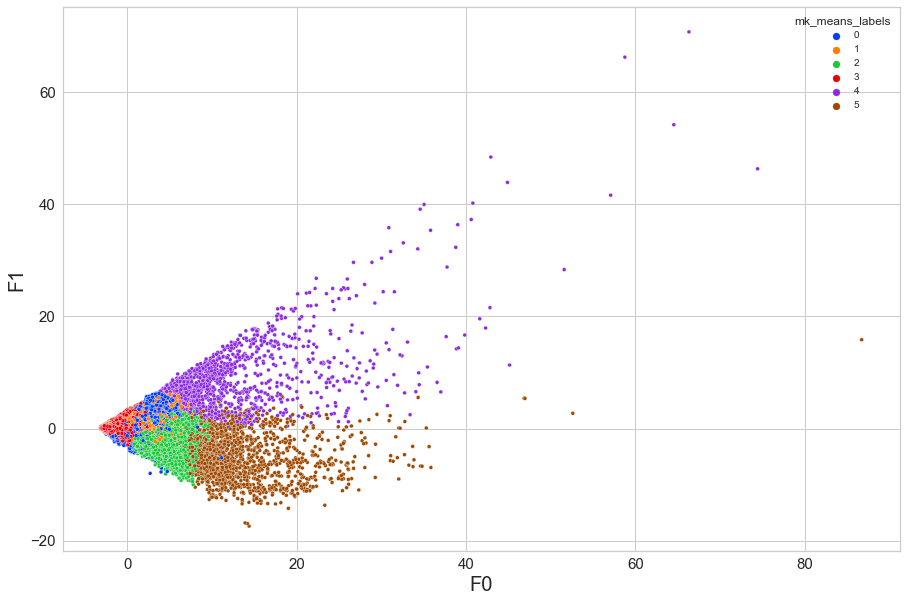

In [195]:
palette = sns.color_palette("bright", len(X_projected['mk_means_labels'].unique()))  #Choosing color
sns.scatterplot(data = X_projected, x = 'F0', y = 'F1', 
                hue = 'mk_means_labels',
                s=15, legend='full', palette=palette)
X_projected.drop(columns=['mk_means_labels'], inplace=True);

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='T1', ylabel='T2'>

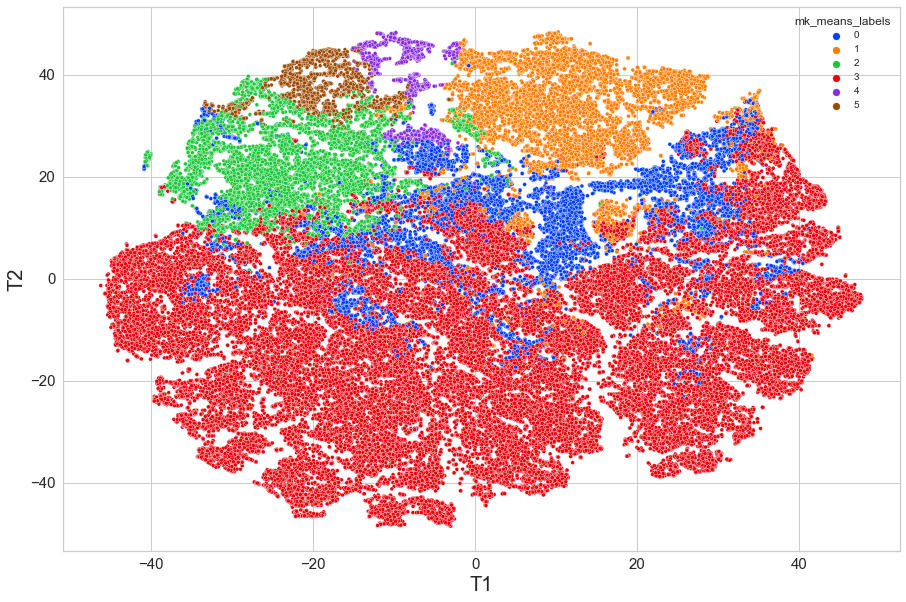

In [196]:
palette = sns.color_palette("bright", len(T.mk_means_labels.unique()))  #Choosing color
sns.scatterplot(T.T1, T.T2, hue=T.mk_means_labels, legend='full', palette=palette, s=15)

## DBSCAN

In [197]:
dbs = DBSCAN(eps = 1, min_samples=20).fit(X_projected)
T['dbs_labels'] = dbs.labels_

In [198]:
len(np.unique(dbs.labels_))

8

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='T1', ylabel='T2'>

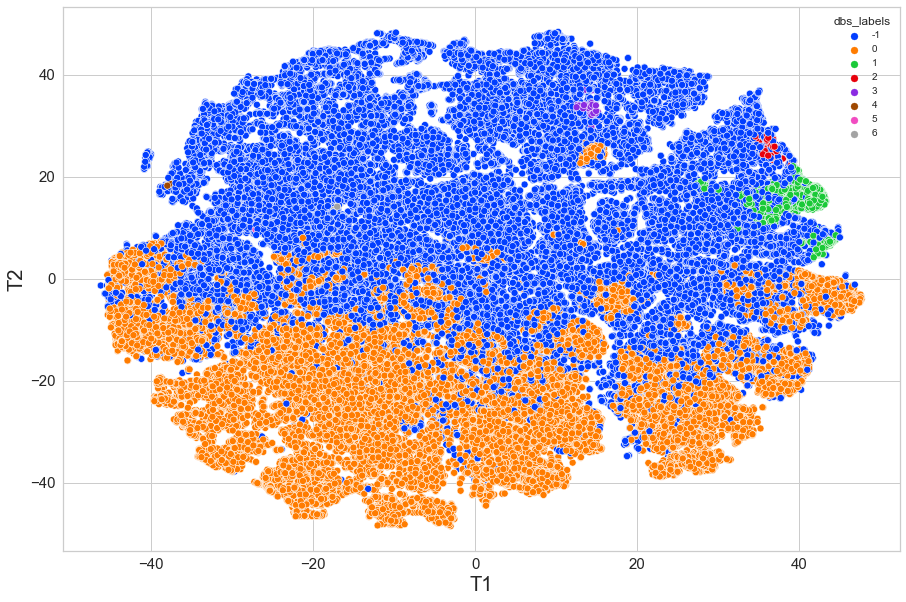

In [199]:
palette = sns.color_palette("bright", len(T.dbs_labels.unique()))  #Choosing color
sns.scatterplot(T.T1, T.T2, hue=T.dbs_labels, legend='full', palette=palette)

## Agglomerative Clustering

In [208]:
#from sklearn.cluster import AgglomerativeClustering
#cah = AgglomerativeClustering(n_clusters = 6).fit(X_projected)
#T['cah_labels'] = cah.labels_
#sns.scatterplot(data=T, x="T1", y="T2", hue="cah_labels")

# Cluster analysis

In [209]:
#df_clients_original = pd.read_csv('data/df_clients.csv')

In [249]:
df_clients_original = pd.read_csv('data/df_original.csv')

In [256]:
import scipy
bb_aggregations = {
    #'product_id': ['count'], #number of buyed products
    'order_id': ['count'], #number of orders per client
    'payment_type':  lambda x: scipy.stats.mode(x)[0], # payment le plus utilisé par le client
    'review_score': ['max', 'min'], #['max', 'min', 'count'], #La score maximale, minimale, et le nombre des scores donné par le client
    'product_category_name_en':  lambda x: scipy.stats.mode(x)[0], #['mode'] the most used product category name for the customer
    'my_categoty':  lambda x: scipy.stats.mode(x)[0], #the most used product category name for the customer
    'customer_state_top10': lambda x: scipy.stats.mode(x)[0],# the customer state name for the customer
    'seller_state_top10': lambda x: scipy.stats.mode(x)[0], # the most used seller state name for the customer
    
    'diff_car_app':['mean'], # the minimum, mean and the maximum of the difference between the time the order was approved and the time the order was delivered to the logistic partner in days per customer
    'diff_del_car':['mean'], # the minimum, mean and the maximum the time taken between when the order was delivered to the customer after the order was delivered to the logistic partner in days per customer
    'diff_est_act':['mean' ], # the minimum, mean and the maximum the difference between the estimated date of arrival and the actual date of arrival in days per client
    'diff_cust_pur':['mean'], # the minimum, mean and the maximum the difference between the time the order was made and the current date per customer
}
df_clients_original = df_clients_original.groupby('customer_unique_id').agg(bb_aggregations)

In [260]:
col_name = pd.Index([e[0] + "_" + e[1].upper().replace('<', '').replace('>', '') for e in df_clients_original.columns.tolist()])
df_clients_original.columns = col_name

df_clients_original = df_clients_original.reset_index()

In [261]:
df_clients_original = df_clients_original[df_clients_original['diff_car_app_MEAN'] >= 0]
df_clients_original = df_clients_original[df_clients_original['diff_del_car_MEAN'] >= 0]
df_clients_original = df_clients_original.reset_index(drop=True)

In [339]:
df_clients_original.loc[:, 'clusters']  = mkmeans.labels_

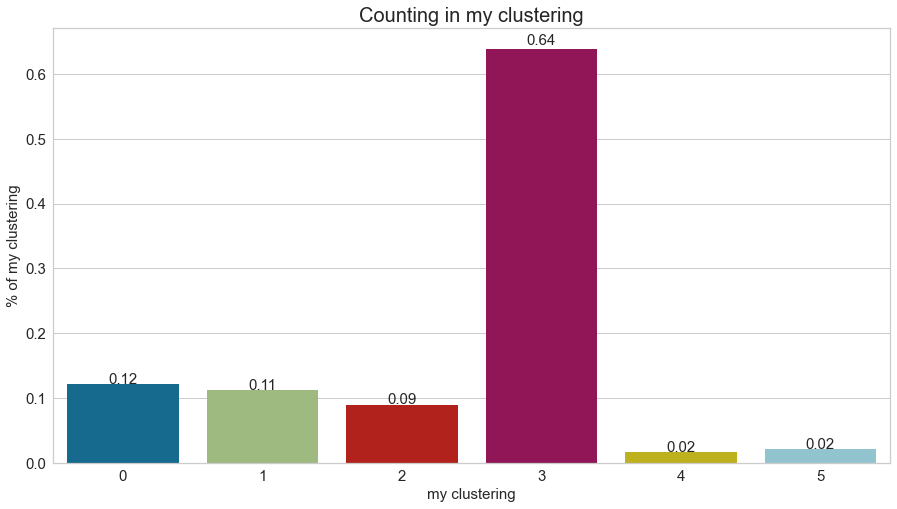

In [340]:
plot_count_col(df_clients_original, col= 'clusters', label_col='my clustering', show_val=True, on_x=True)

We observe that the biggest cluster is the cluster `3` that consists of 64% of the data. And the smallsest clusters is the `4`-th and `5`-th cluster consisting just 2% of data. We will try to analyse theese clusters one by one giving some informations about them.

In [327]:
df_clients_original.groupby('clusters').agg('mean')

order_id_COUNT  review_score_MAX  review_score_MIN  \
clusters                                                       
-1              1.128196          3.848671          3.812232   
 0              1.012400          4.718811          4.714956   
 1              1.007675          1.196470          1.196470   
 2              1.000000          1.000000          1.000000   
 3              1.000000          5.000000          5.000000   
 4              1.000000          5.000000          5.000000   
 5              1.000000          5.000000          5.000000   
 6              1.000000          5.000000          5.000000   

          diff_car_app_MEAN  diff_del_car_MEAN  diff_est_act_MEAN  \
clusters                                                            
-1                 3.396727          11.622073          11.345446   
 0                 1.817667           6.051353          12.691898   
 1                 1.753645           5.018803          11.453185   
 2                 1.761364          28.102273          -6.755682   
 3                 1.189655          11.804598          16.919540   
 4                 0.977778           4.333333          10.266667   
 5                 1.058824           3.647059          15.705882   
 6                 1.260000           6.120000          13.540000   

          diff_cust_pur_MEAN  
clusters                      
-1                247.901283  
 0                229.032488  
 1                223.120107  
 2                211.795455  
 3                232.224138  
 4                345.111111  
 5                212.235294  
 6                184.180000

In [266]:
df_clients_original.drop(columns=['customer_unique_id']).groupby('clusters').agg('max')

order_id_COUNT payment_type_LAMBDA  review_score_MAX  \
clusters                                                         
0                      9             voucher                 5   
1                      6             voucher                 5   
2                      6             voucher                 5   
3                      6             voucher                 5   
4                     13             voucher                 5   
5                     14             voucher                 5   

          review_score_MIN product_category_name_en_LAMBDA my_categoty_LAMBDA  \
clusters                                                                        
0                        5                   watches_gifts              tools   
1                        5                   watches_gifts              tools   
2                        5                   watches_gifts              tools   
3                        5                   watches_gifts              tools   
4                        5                   watches_gifts              tools   
5                        5                   watches_gifts              tools   

         customer_state_top10_LAMBDA seller_state_top10_LAMBDA  \
clusters                                                         
0                                 SP                        SP   
1                                 SP                        SP   
2                                 SP                        SP   
3                                 SP                        SP   
4                                 SP                        SP   
5                                 SP                        SP   

          diff_car_app_MEAN  diff_del_car_MEAN  diff_est_act_MEAN  \
clusters                                                            
0                     101.0               93.0              135.0   
1                      22.0              205.0              140.0   
2                      27.0              129.0               84.0   
3                      10.0               67.0              147.0   
4                     107.0              124.0               51.0   
5                      61.0              190.0               78.0   

          diff_cust_pur_MEAN  
clusters                      
0                      696.0  
1                      695.0  
2                      696.0  
3                      695.0  
4                      695.0  
5                      694.0

In [267]:
df_clients_original.drop(columns=['customer_unique_id']).groupby('clusters').agg('min')

order_id_COUNT payment_type_LAMBDA  review_score_MAX  \
clusters                                                         
0                      1              boleto                 1   
1                      1              boleto                 1   
2                      1              boleto                 1   
3                      1              boleto                 1   
4                      1              boleto                 1   
5                      1              boleto                 1   

          review_score_MIN product_category_name_en_LAMBDA my_categoty_LAMBDA  \
clusters                                                                        
0                        1      agro_industry_and_commerce        accessories   
1                        1      agro_industry_and_commerce        accessories   
2                        1      agro_industry_and_commerce        accessories   
3                        1      agro_industry_and_commerce        accessories   
4                        1      agro_industry_and_commerce        accessories   
5                        1      agro_industry_and_commerce        accessories   

         customer_state_top10_LAMBDA seller_state_top10_LAMBDA  \
clusters                                                         
0                                 BA                        BA   
1                                 BA                        BA   
2                                 BA                        BA   
3                                 BA                        BA   
4                                 BA                        BA   
5                                 BA                        BA   

          diff_car_app_MEAN  diff_del_car_MEAN  diff_est_act_MEAN  \
clusters                                                            
0                       0.0                0.0              -91.0   
1                       0.0                1.0             -188.0   
2                       0.0                0.0             -109.0   
3                       0.0                0.0              -56.0   
4                       0.0                0.0              -96.0   
5                       0.0                0.0             -175.0   

          diff_cust_pur_MEAN  
clusters                      
0                        2.0  
1                        7.0  
2                        1.0  
3                        1.0  
4                        4.0  
5                        2.0

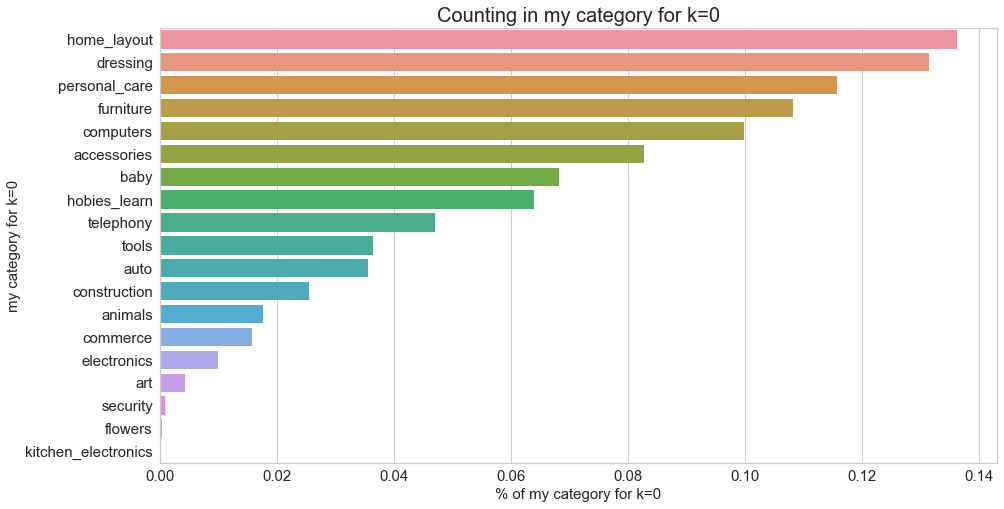

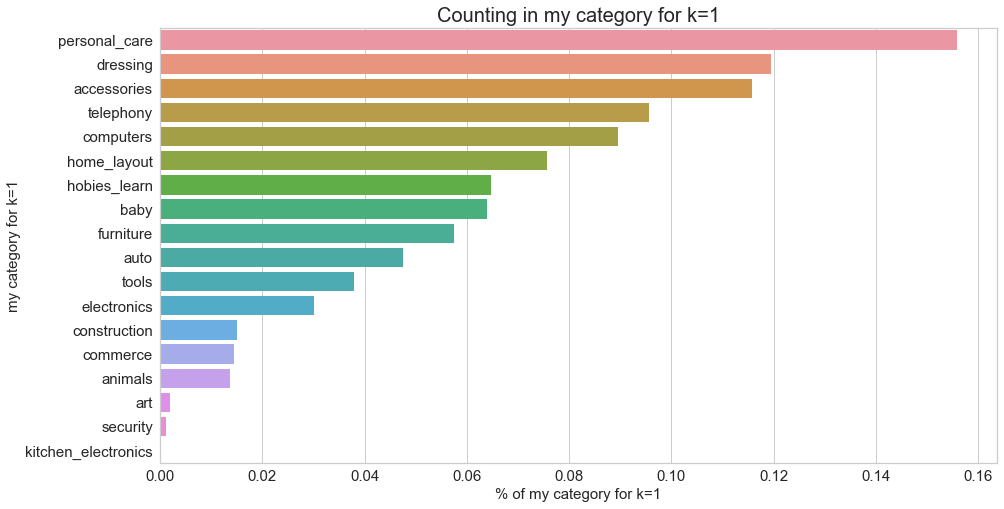

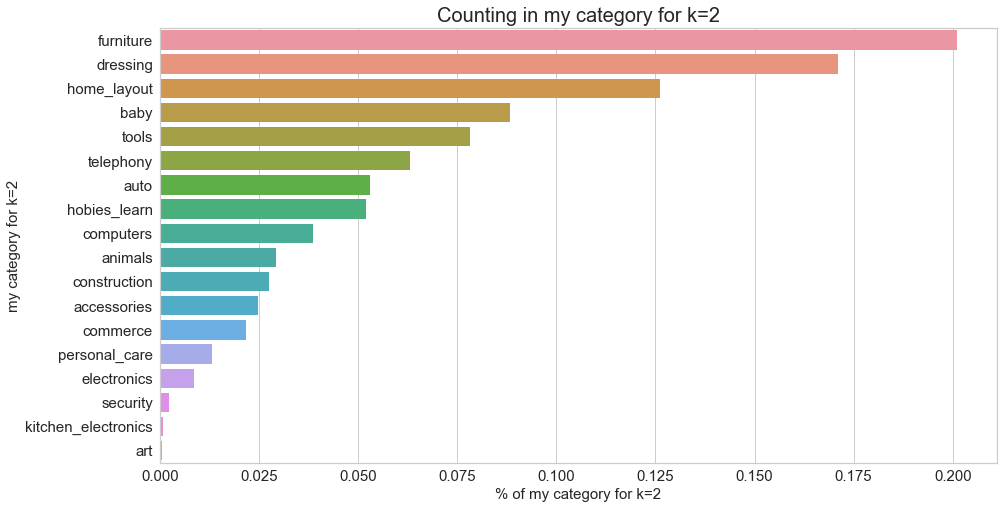

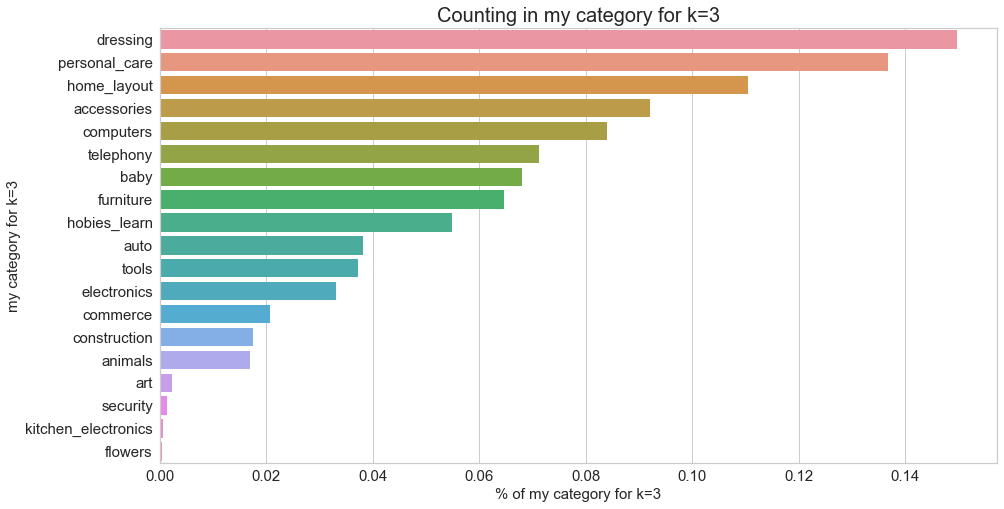

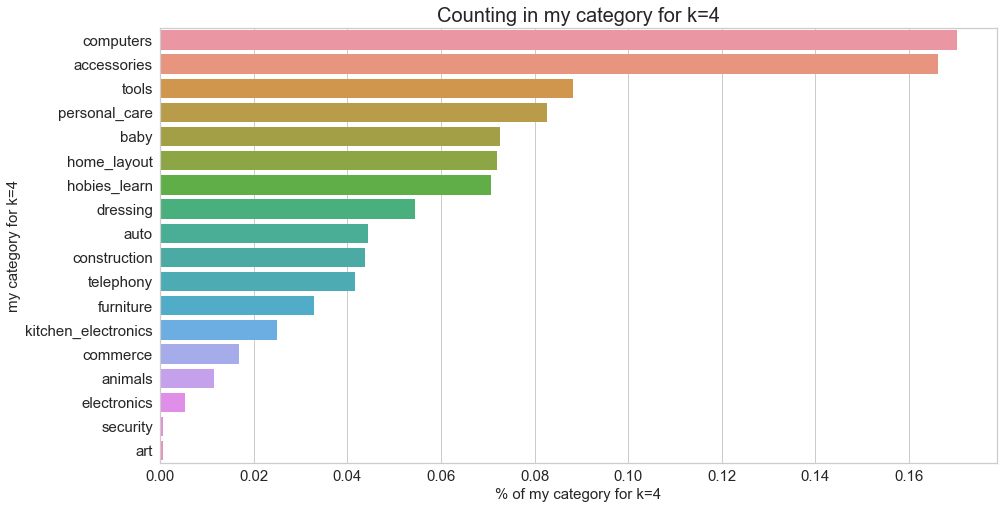

In [348]:
for k in range(0, max(mkmeans.labels_)):
    plot_count_col(df_clients_original[(df_clients_original.clusters==k)], col= 'my_categoty_LAMBDA', label_col='my category for k={0}'.format(k), show_val=False, on_x=False)

WE can see that each of clients from each cluster will by every type of category. But wich are the most important for each category of clients let's see. For 
 - category 0: home_layout,
 - category 1: personal_care,
 - category 2: furniture,
 - category 3: dressing,
 - category 4: computers,

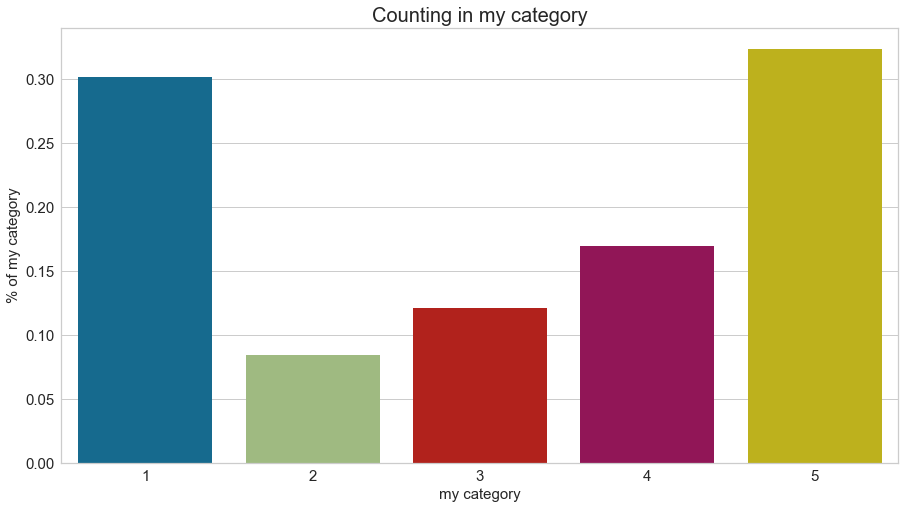

In [354]:
plot_count_col(df_clients_original[(df_clients_original.clusters==0) & (df_clients_original.my_categoty_LAMBDA=='home_layout')], col= 'review_score_MIN', label_col='my category', show_val=False, on_x=True)

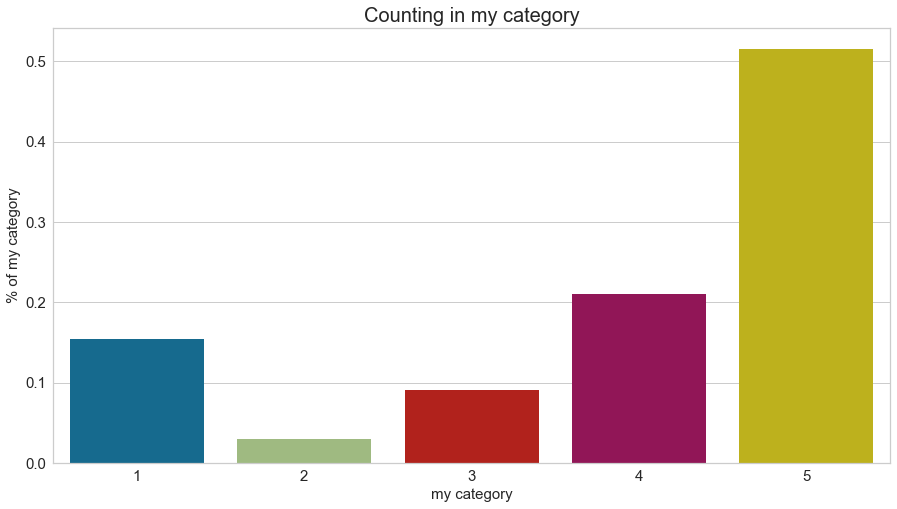

In [357]:
plot_count_col(df_clients_original[(df_clients_original.clusters==1) & (df_clients_original.my_categoty_LAMBDA=='personal_care')], col= 'review_score_MIN', label_col='my category', show_val=False, on_x=True)

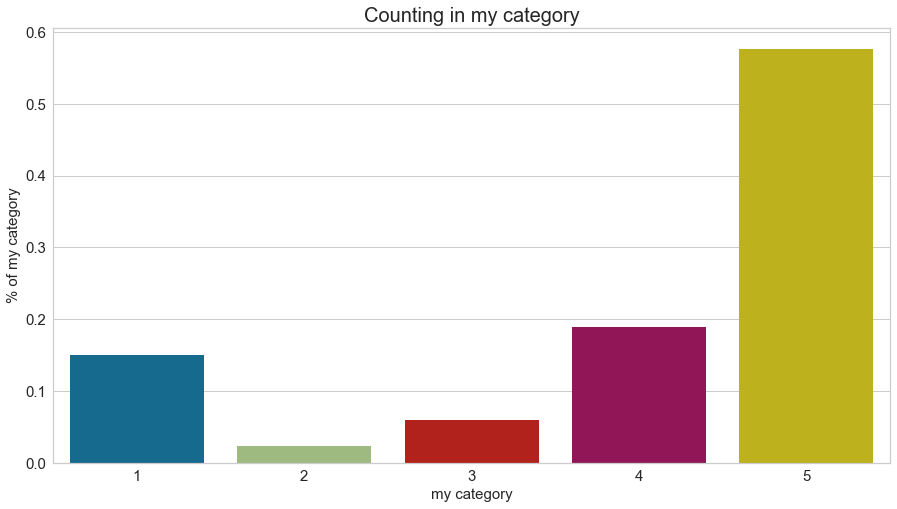

In [358]:
plot_count_col(df_clients_original[(df_clients_original.clusters==4) & (df_clients_original.my_categoty_LAMBDA=='computers')], col= 'review_score_MIN', label_col='my category', show_val=False, on_x=True)

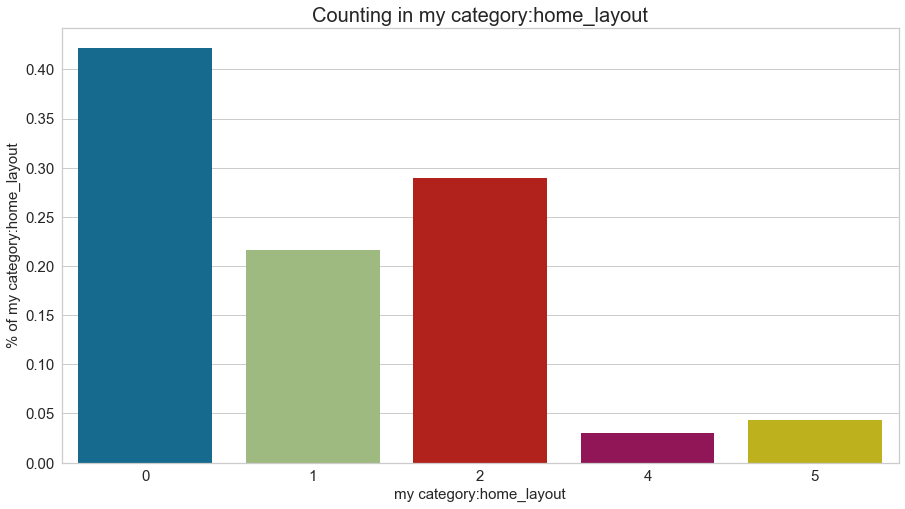

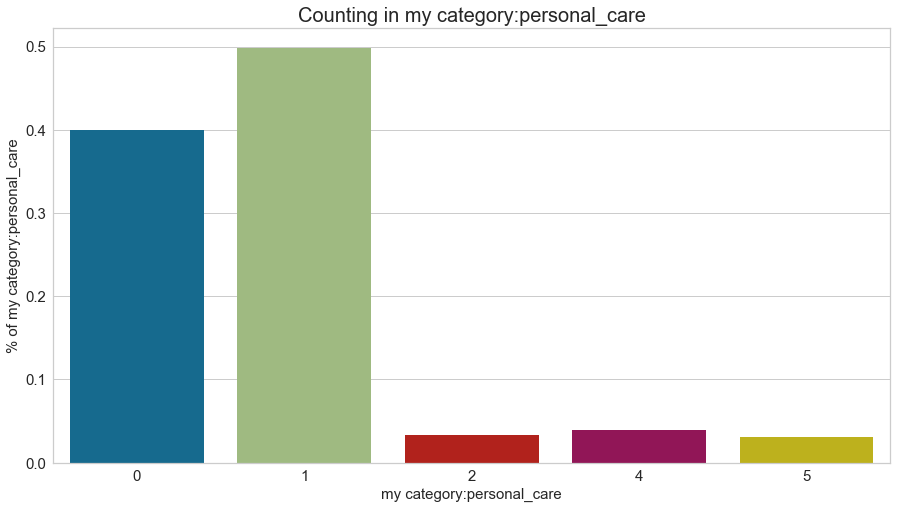

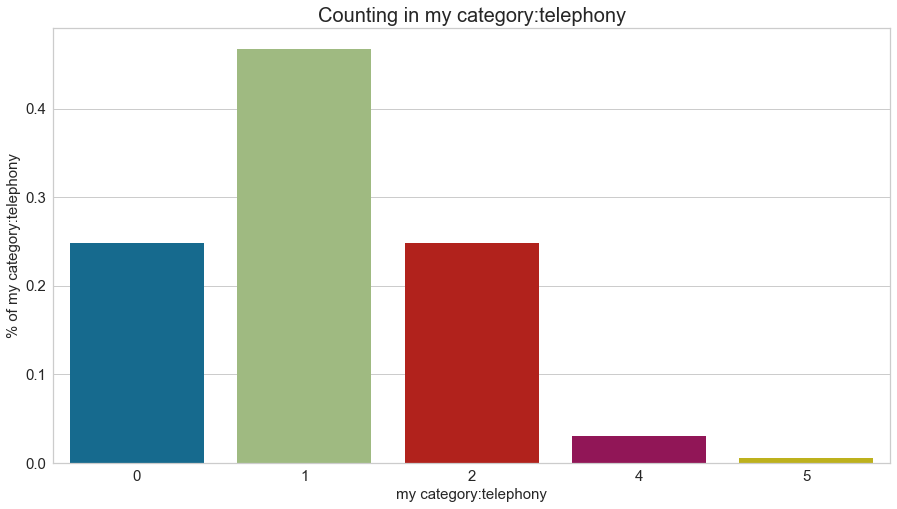

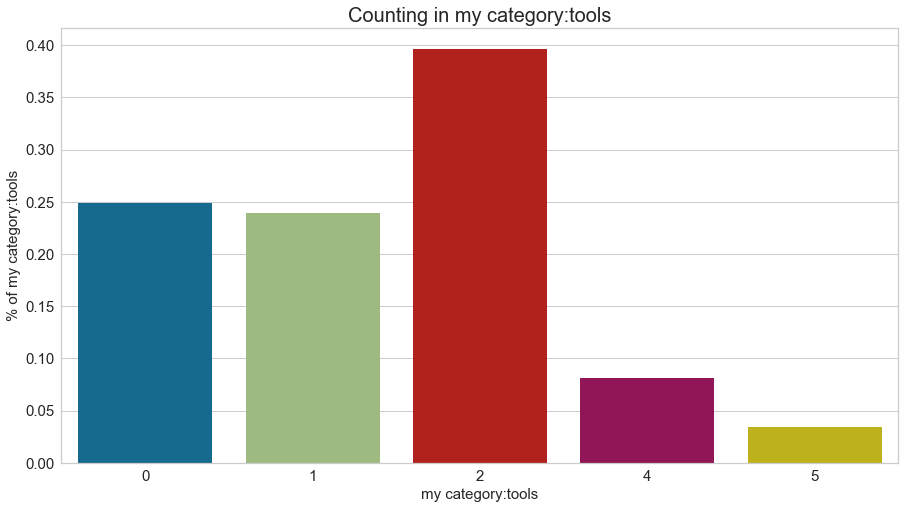

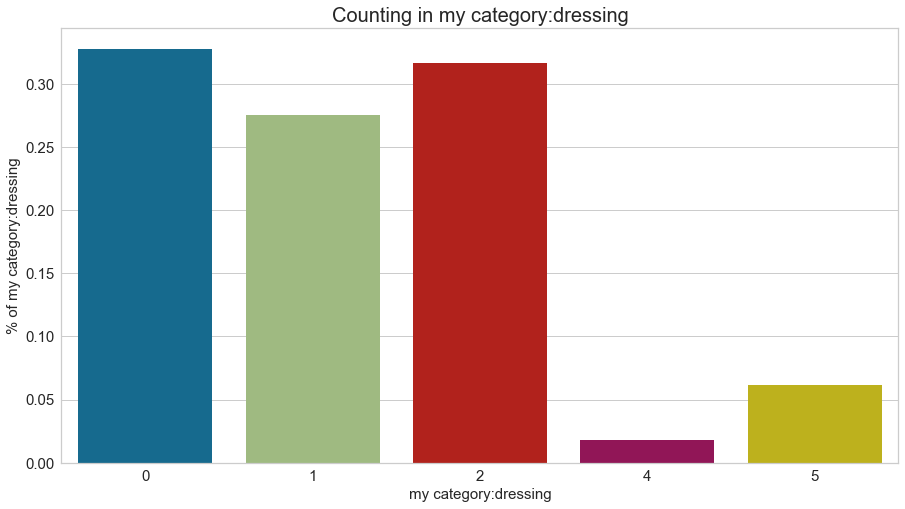

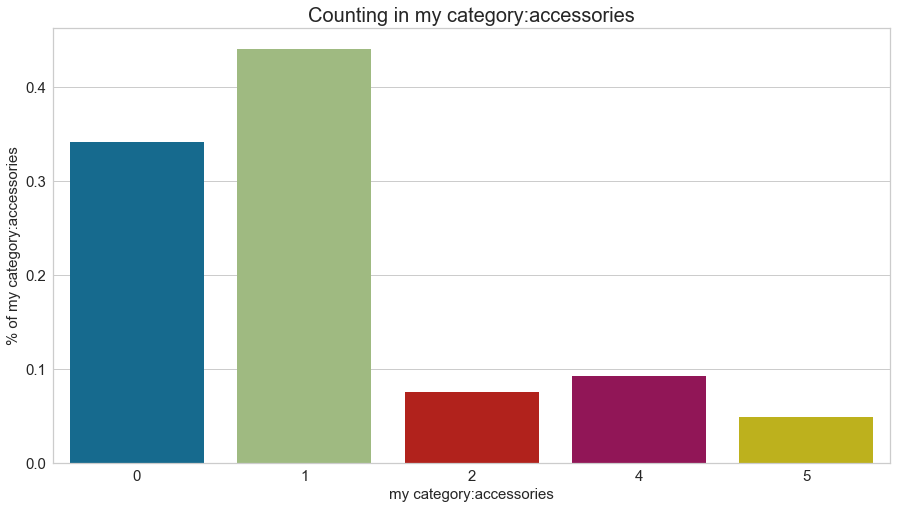

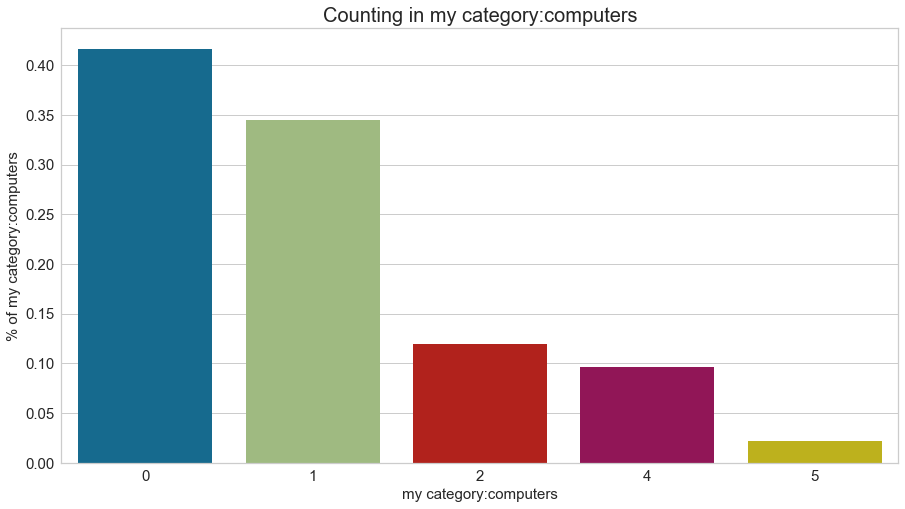

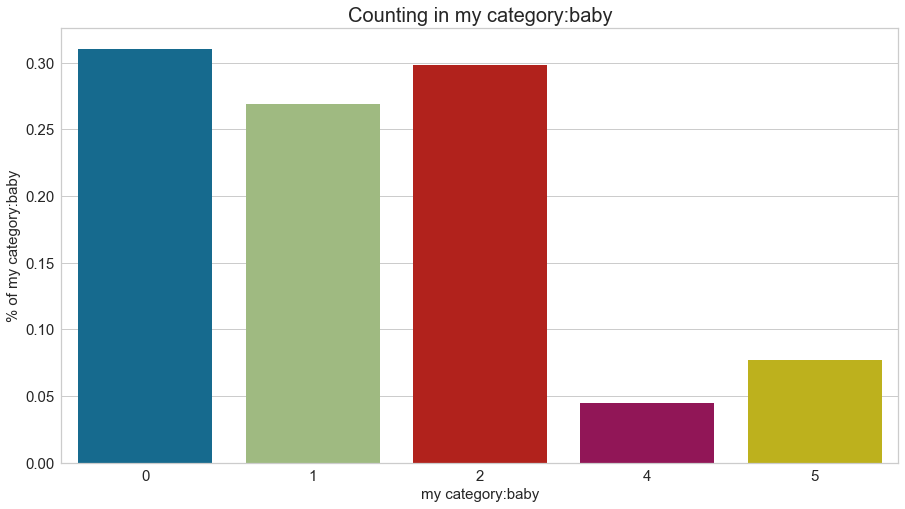

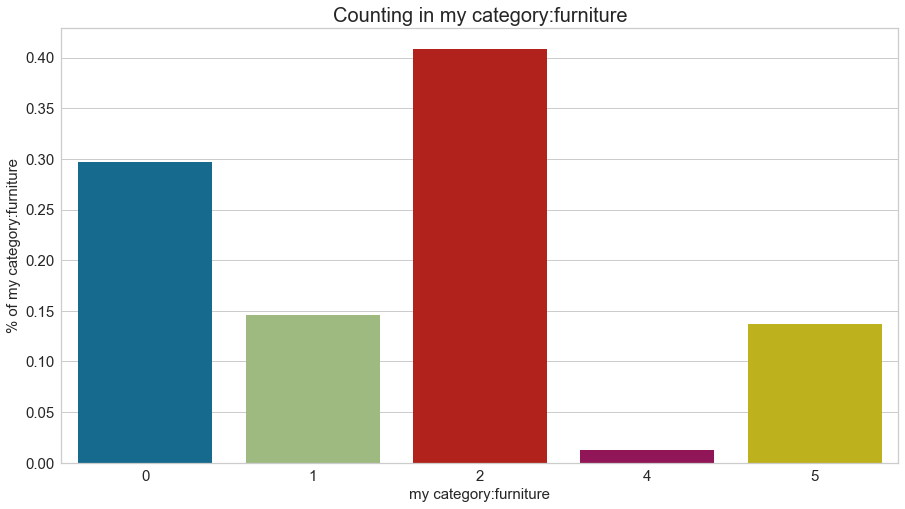

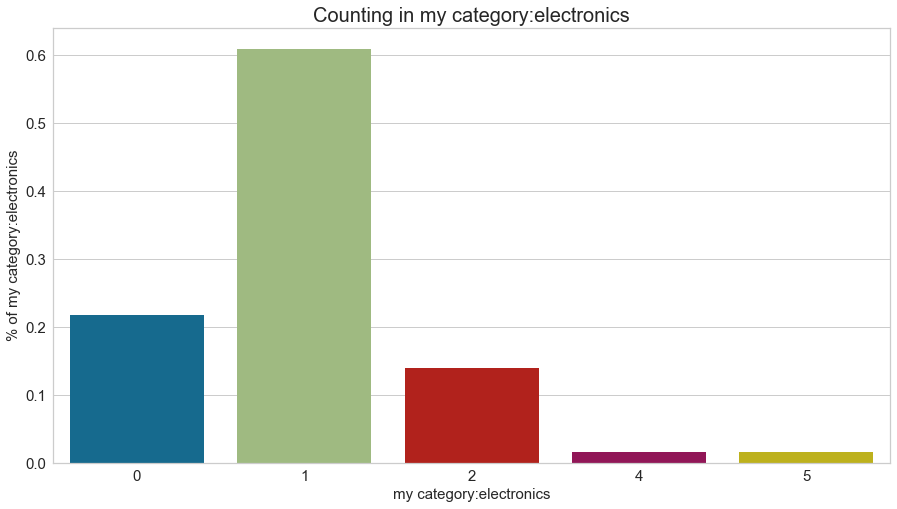

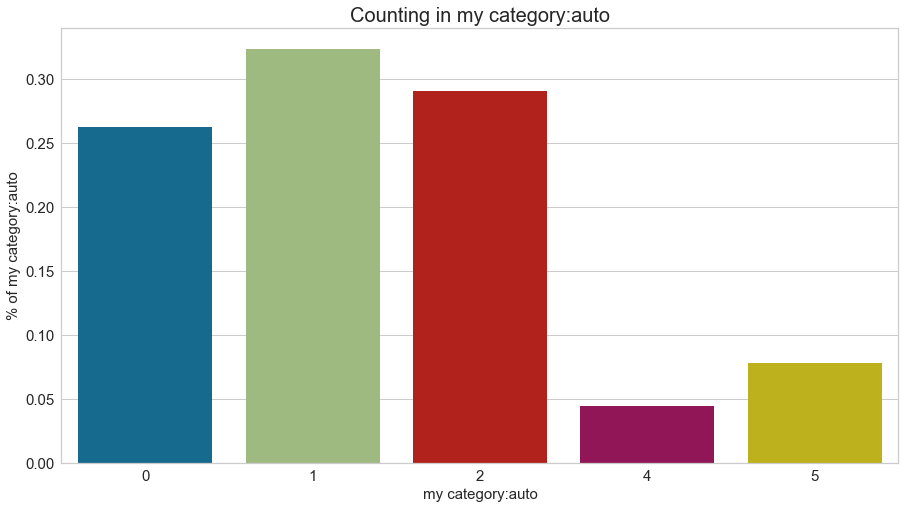

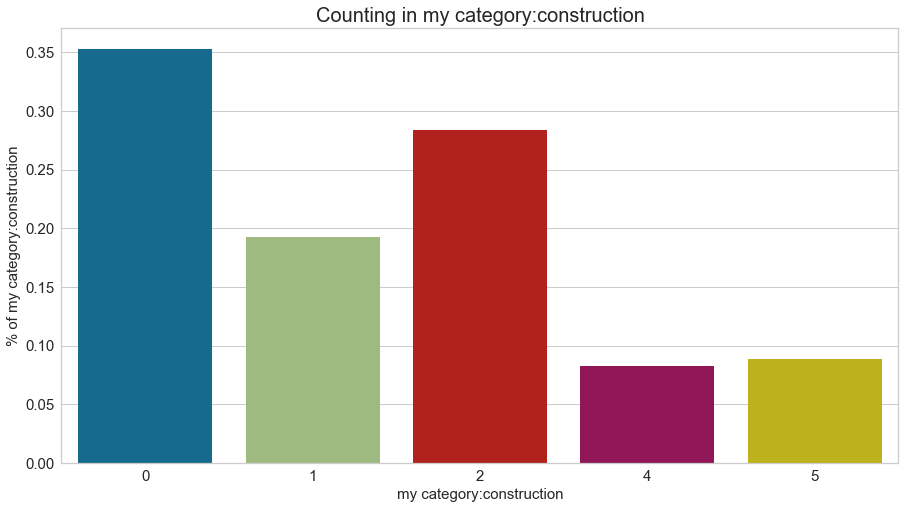

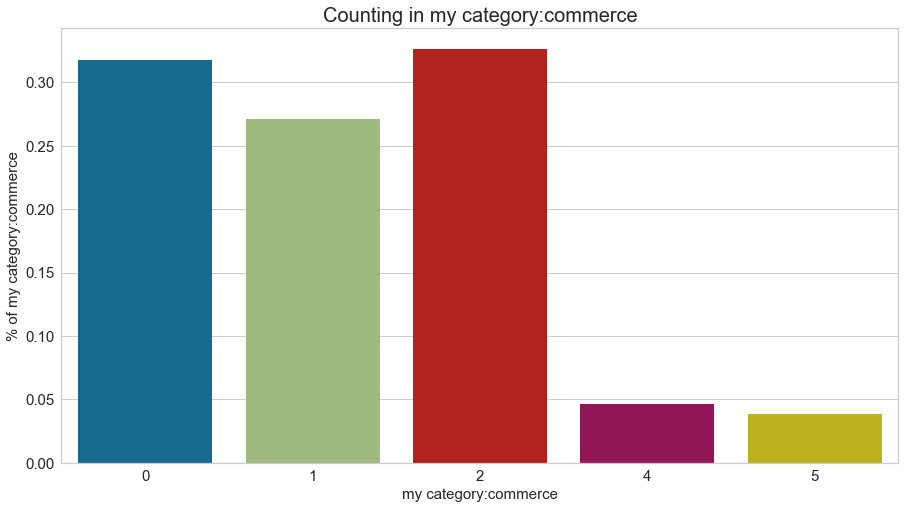

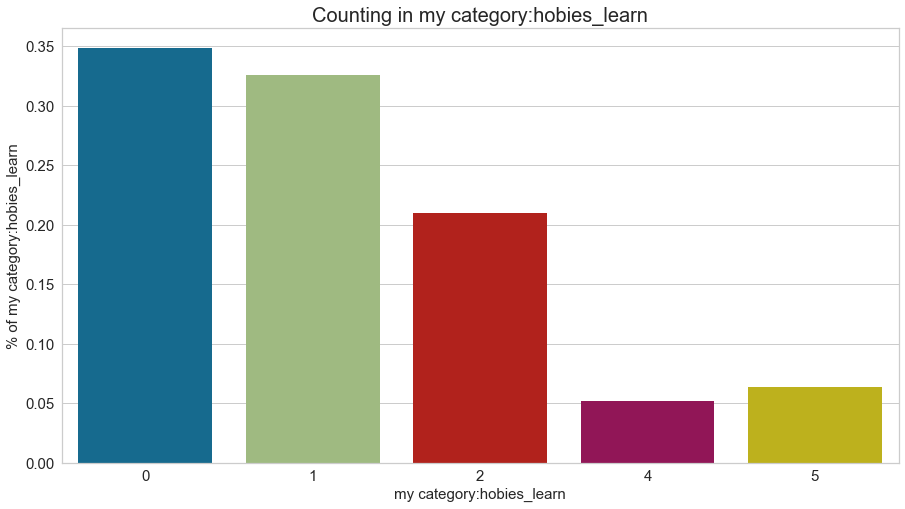

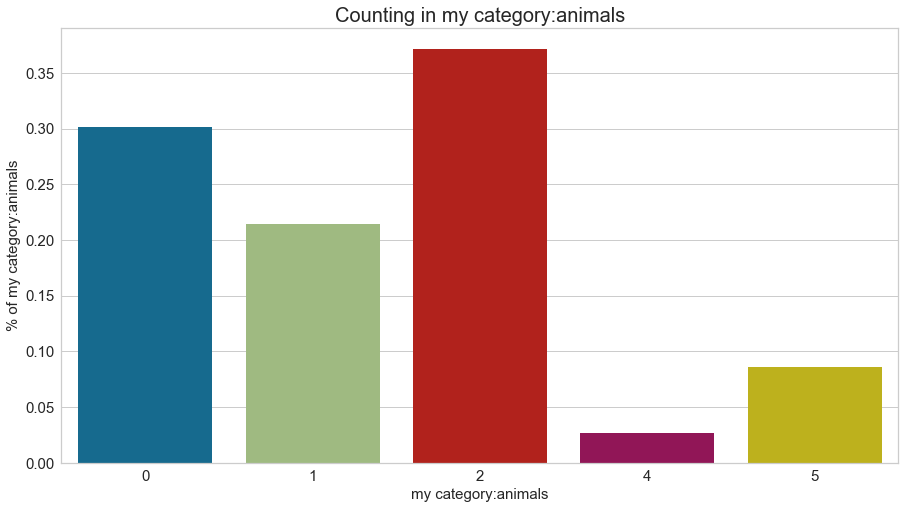

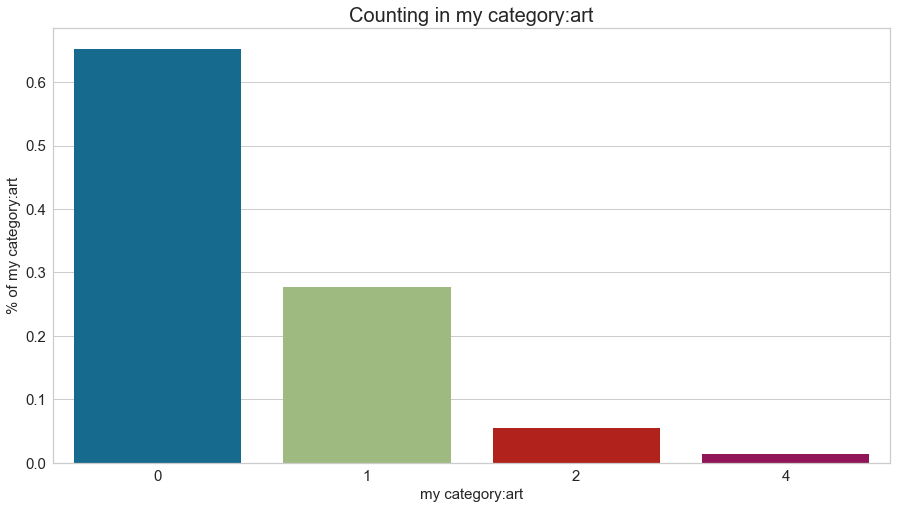

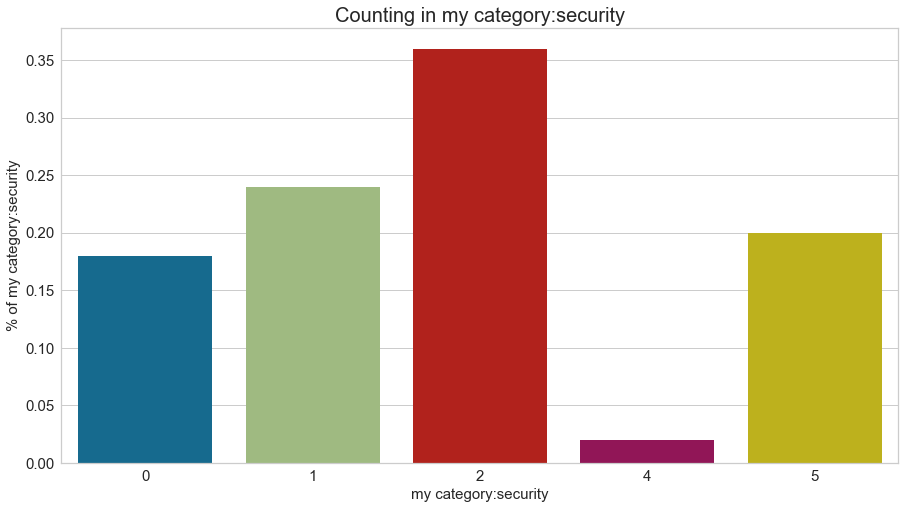

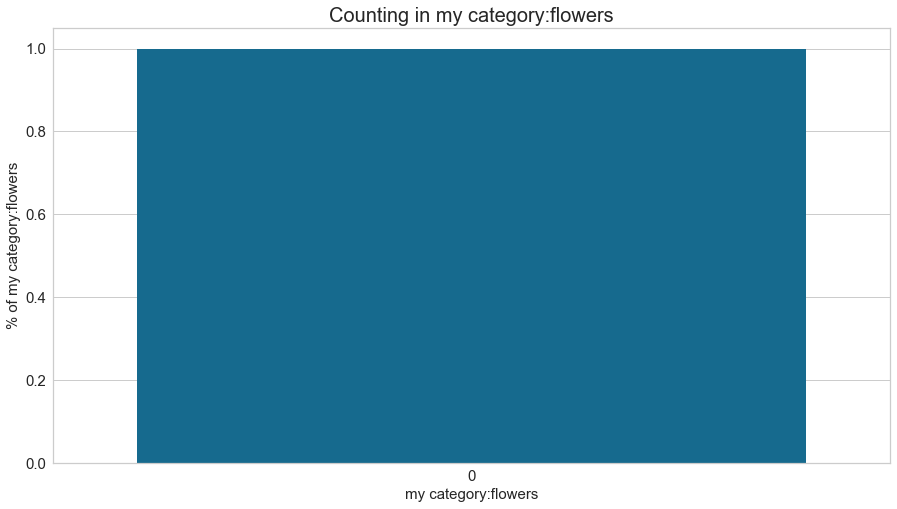

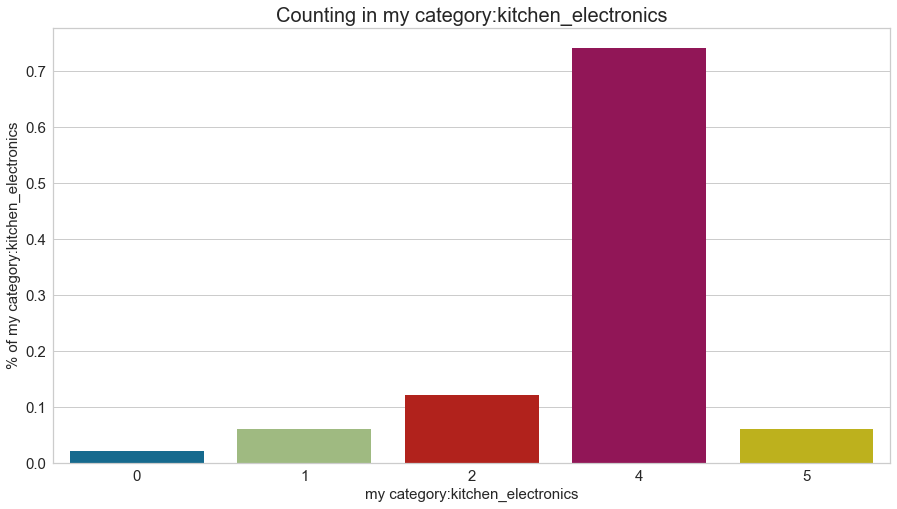

In [359]:
for f in df_clients_original.my_categoty_LAMBDA.unique():
    plot_count_col(df_clients_original[(df_clients_original.my_categoty_LAMBDA==f) & (df_clients_original.clusters!=3)], col= 'clusters', label_col='my category:{0}'.format(f), show_val=False, on_x=True)

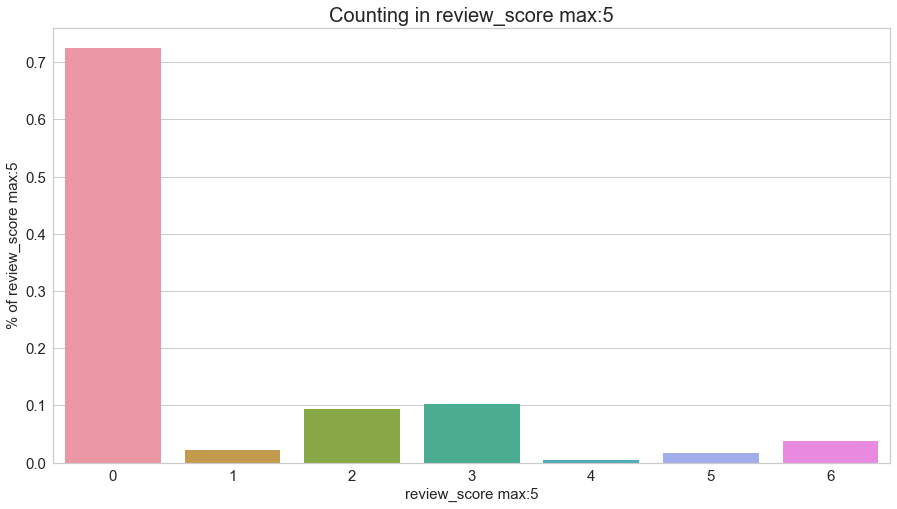

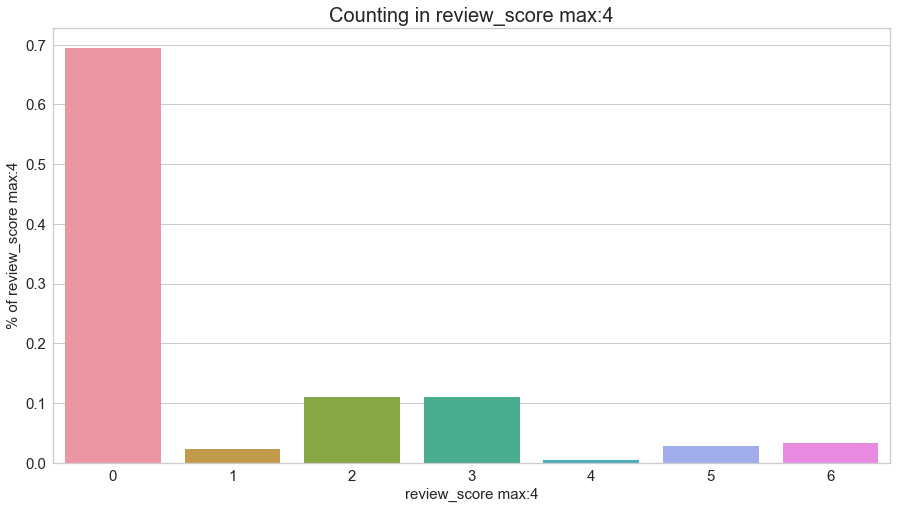

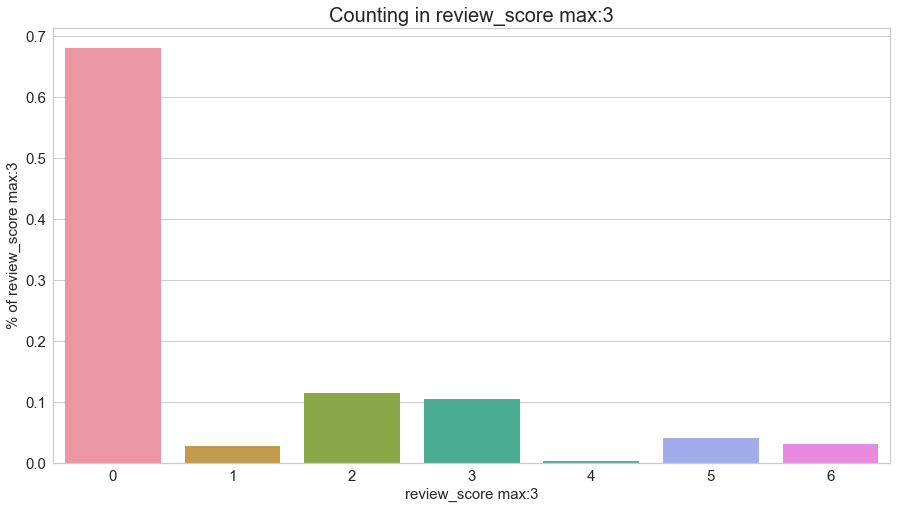

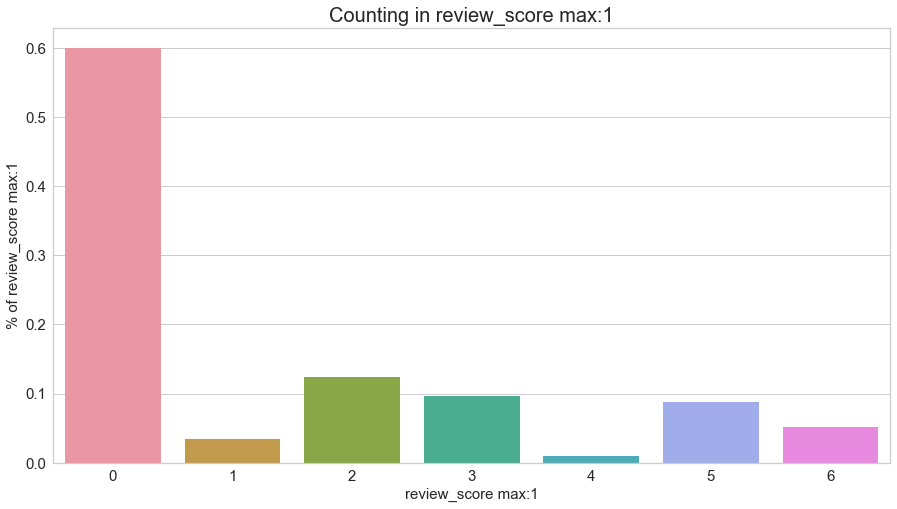

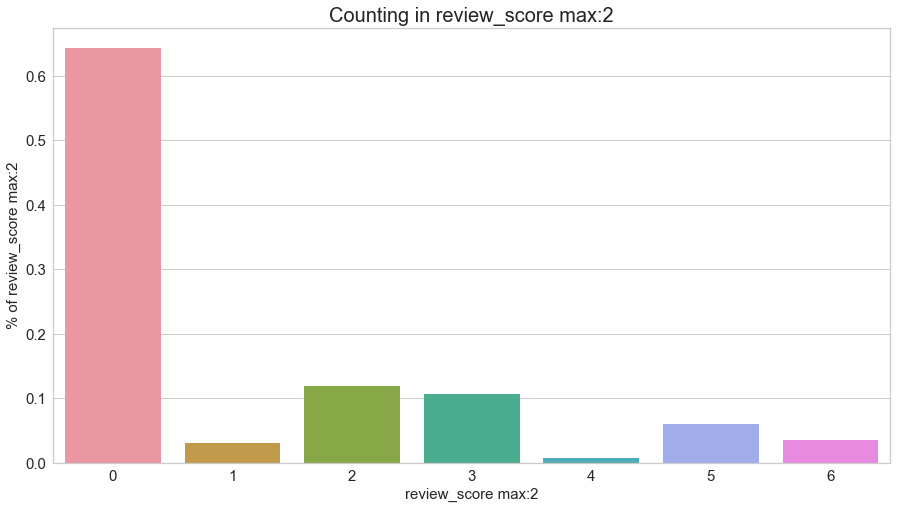

In [63]:
for f in df_clients_original.review_score_MAX.unique():
    plot_count_col(df_clients_original[df_clients_original.review_score_MAX==f], col= 'clusters', label_col='review_score max:{0}'.format(f), show_val=False, on_x=True)

In [ ]:
df_clients_original[df_clients_original.clusters==4].payment_type_LAMBDA